-----------------------------------


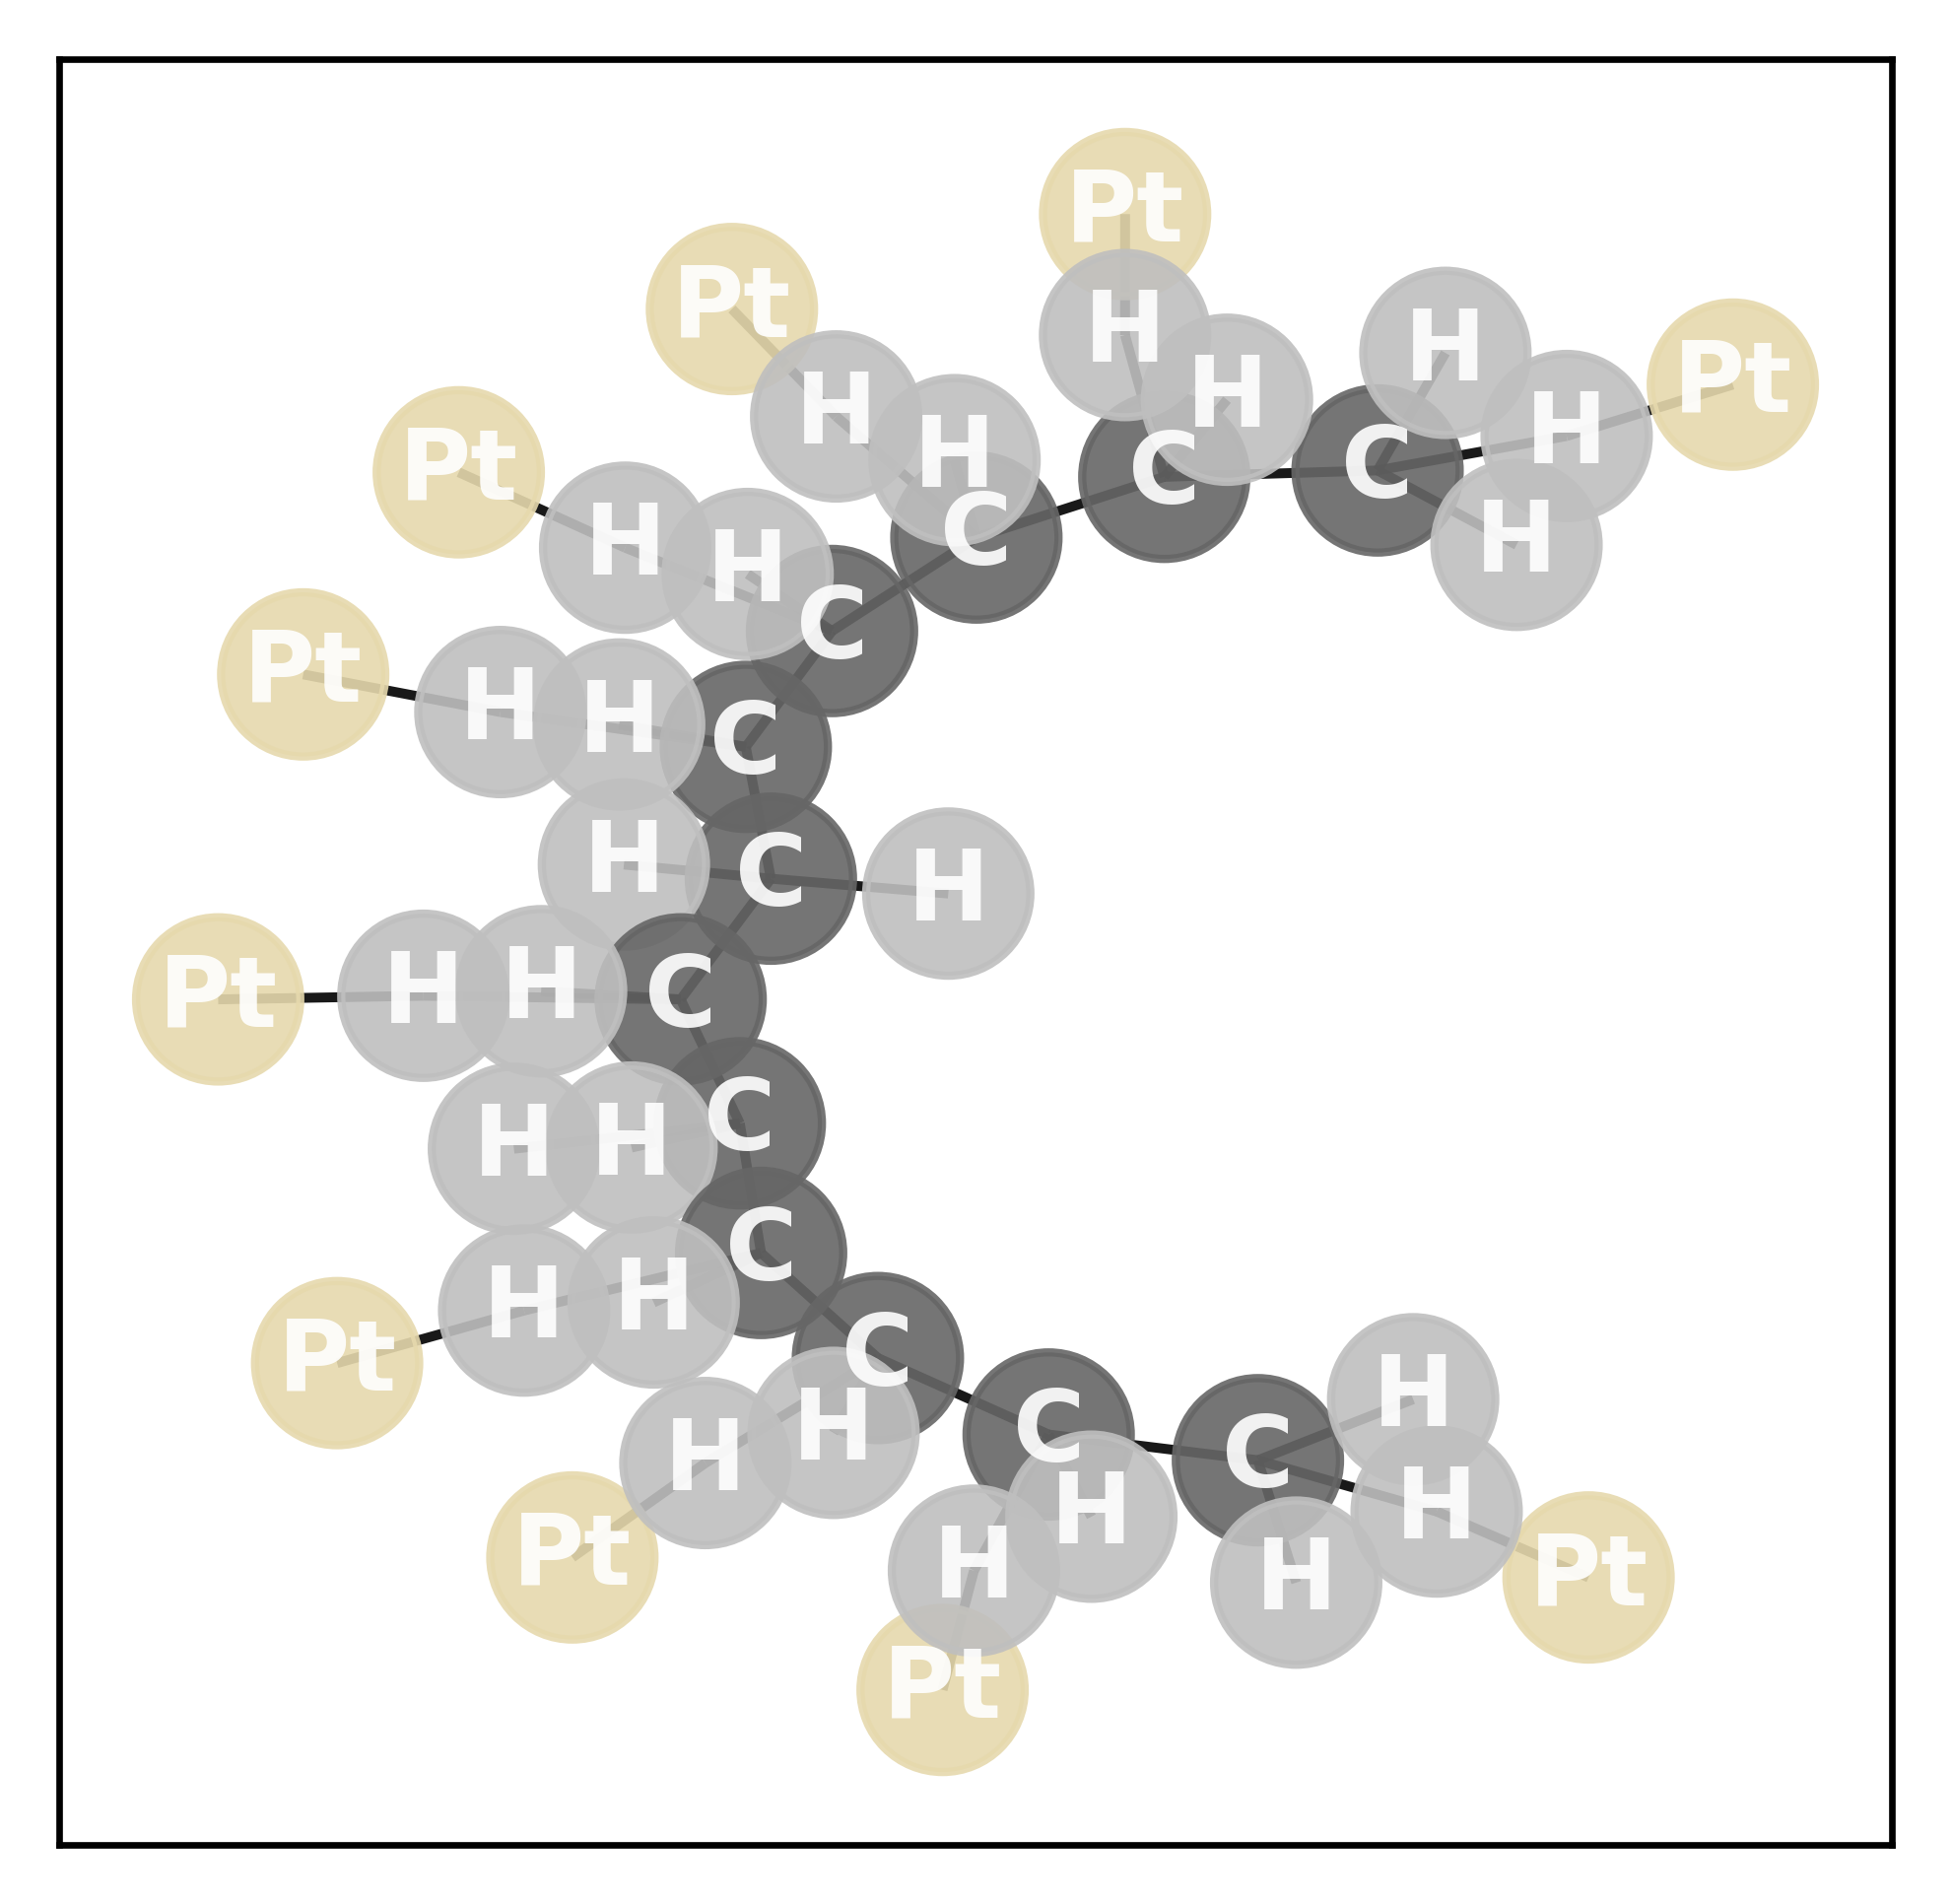

System: pt-PE
GNN energy = -207.07 eV 
VASP energy = -207.79174933000013 eV
Abs. Error = 0.72 eV
-----------------------------------


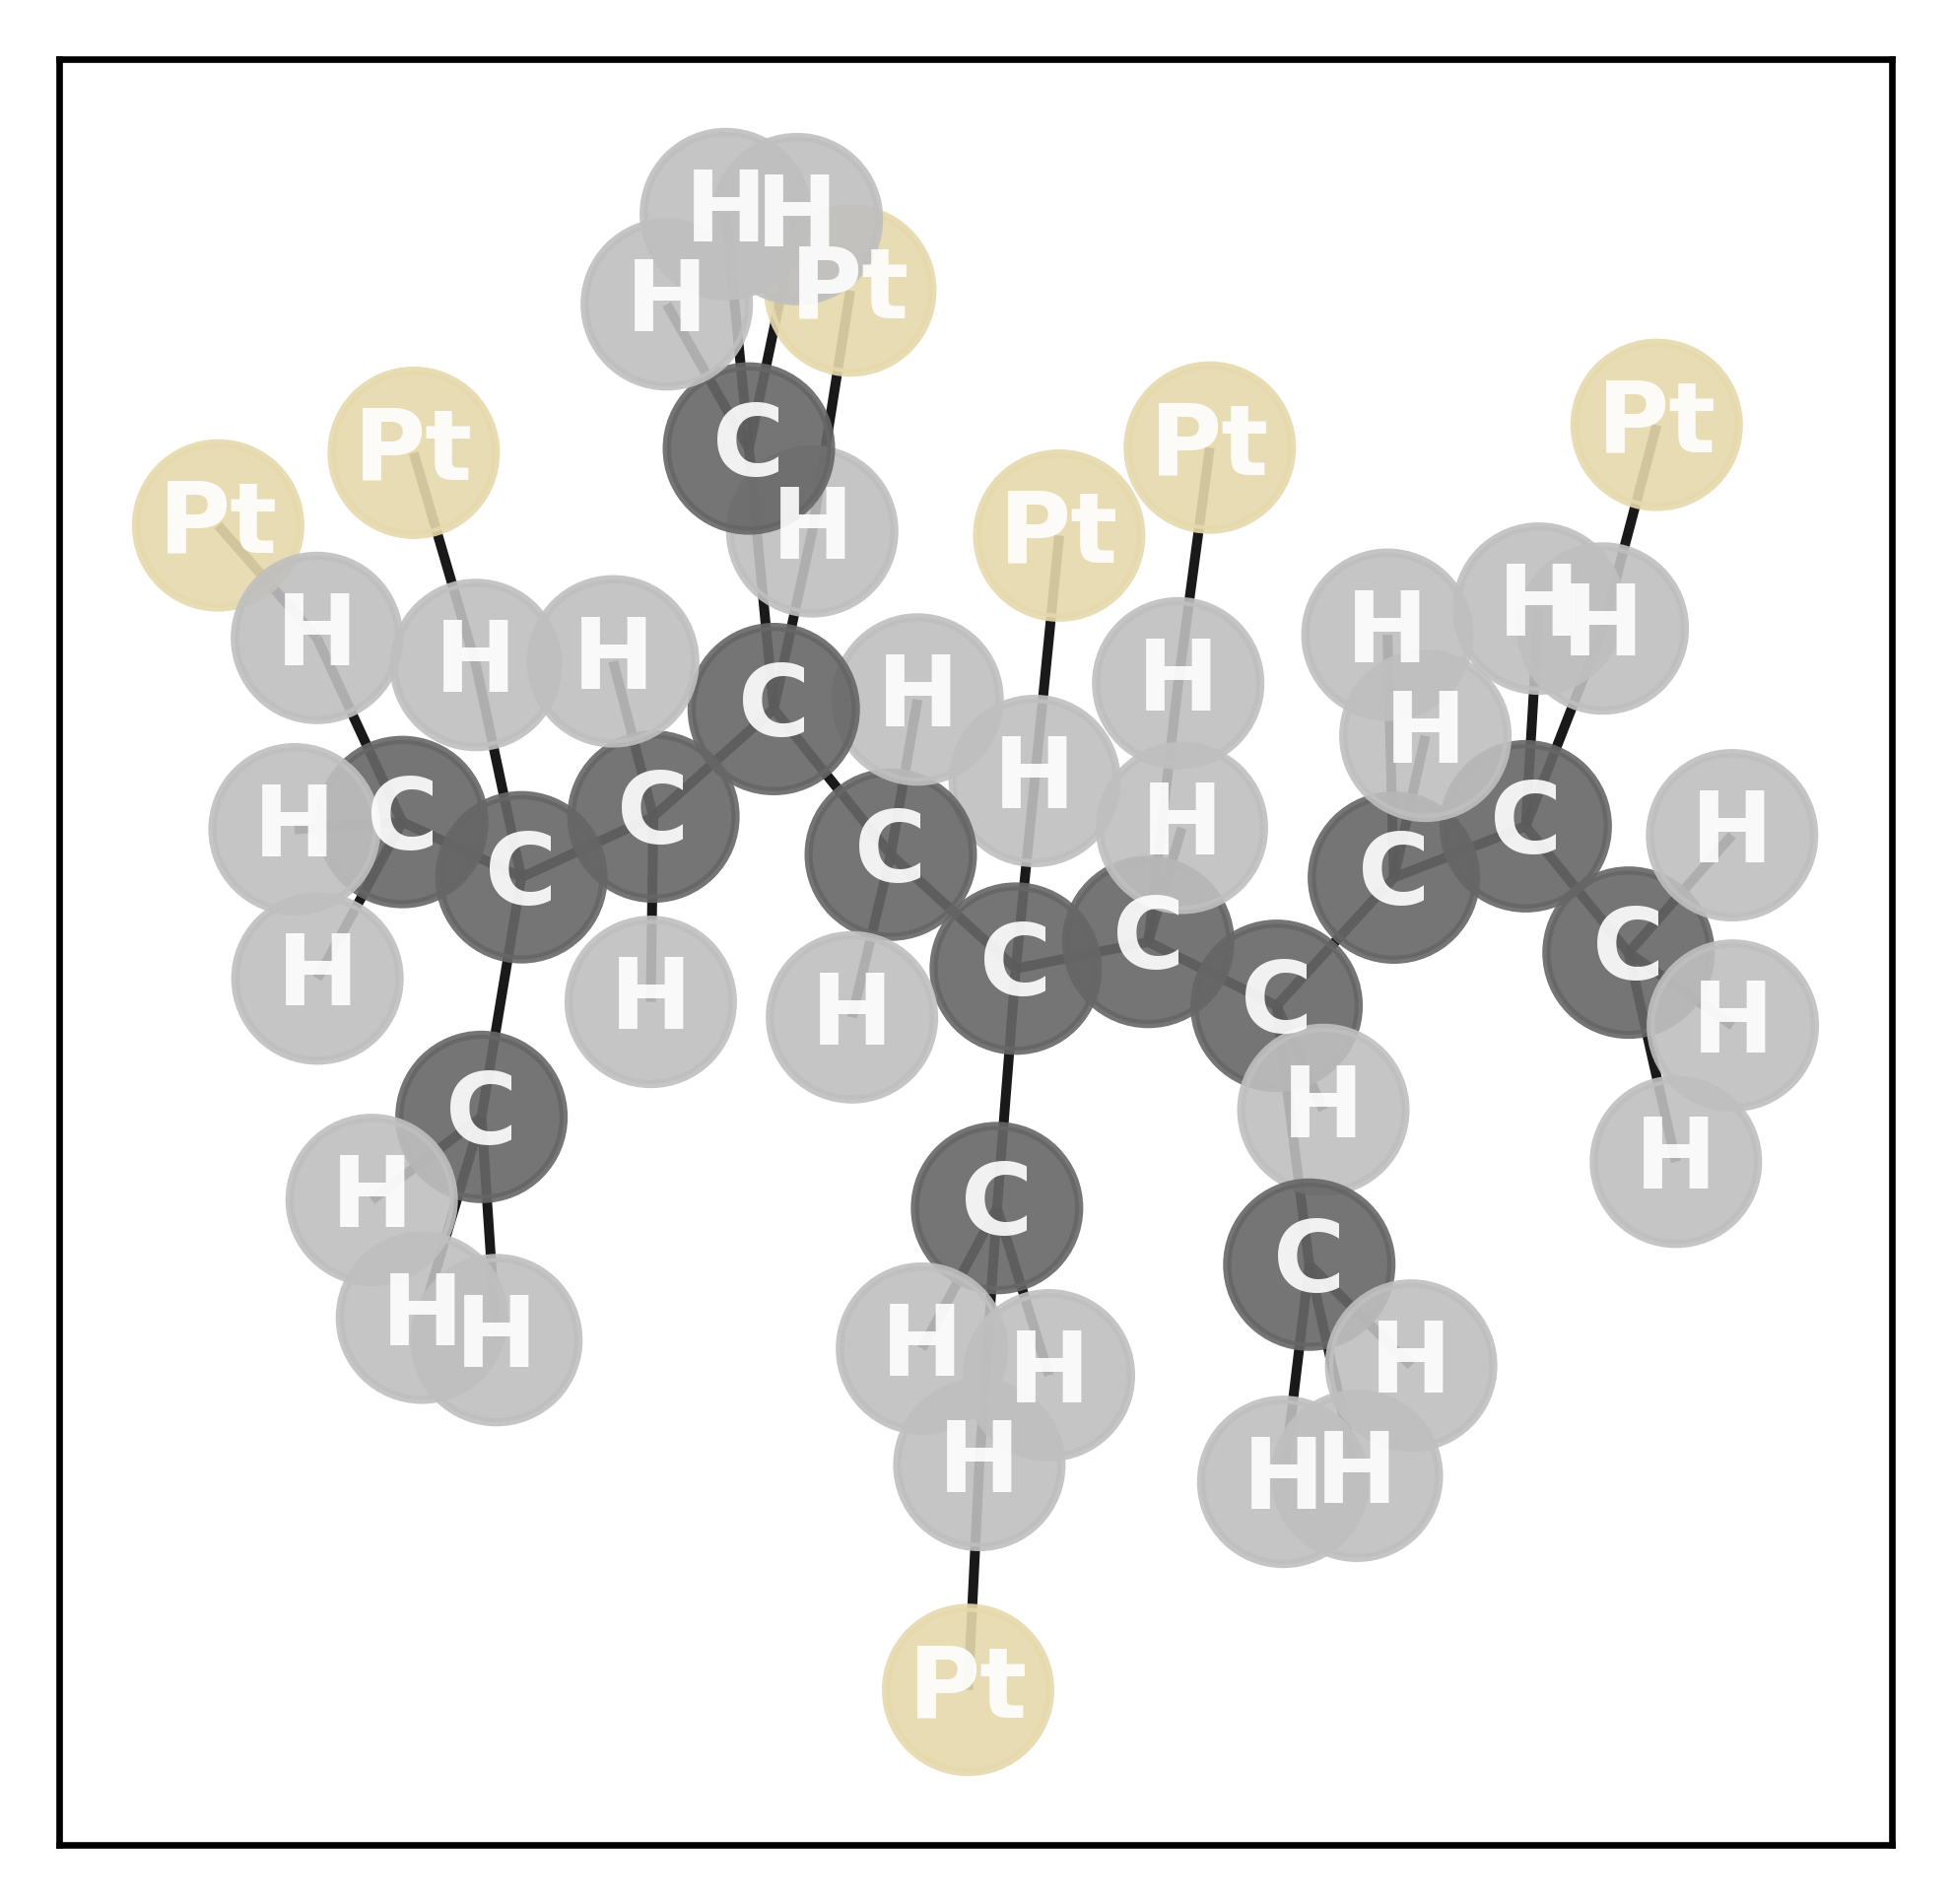

System: pt-PPit
GNN energy = -256.17 eV 
VASP energy = -257.18159251 eV
Abs. Error = 1.01 eV
-----------------------------------


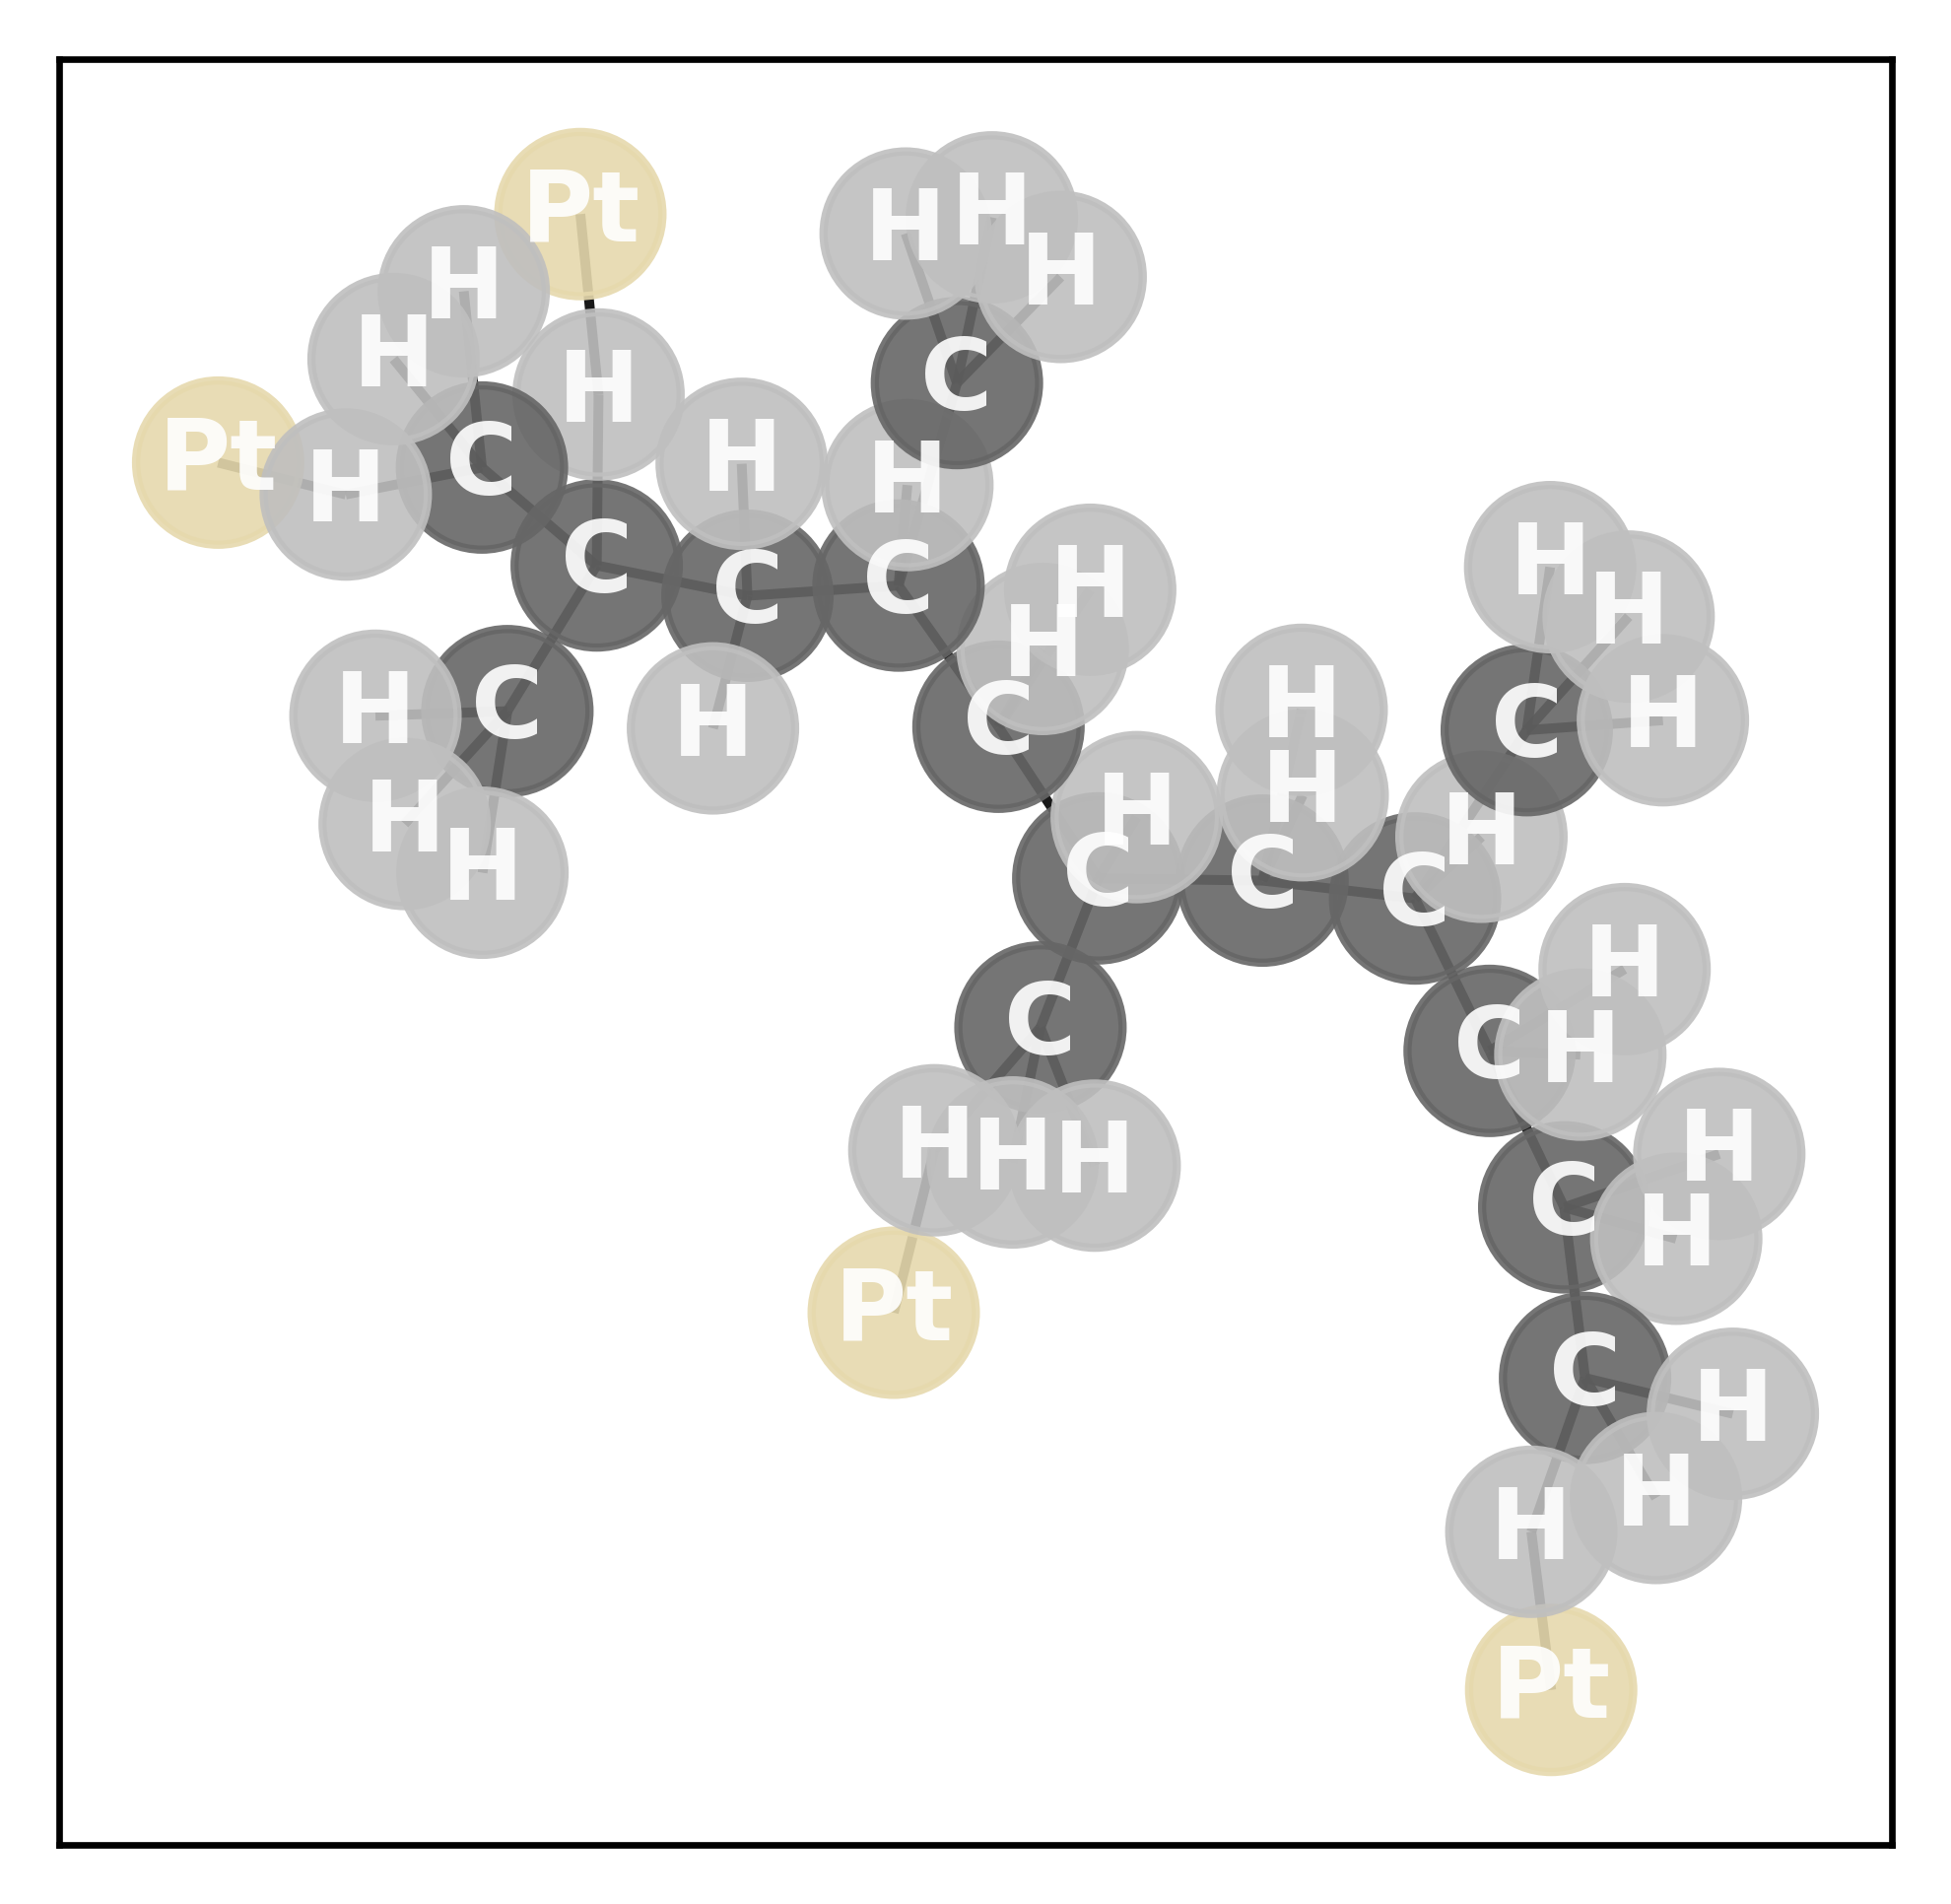

System: pt-PPst
GNN energy = -256.04 eV 
VASP energy = -257.4750978300001 eV
Abs. Error = 1.43 eV
-----------------------------------


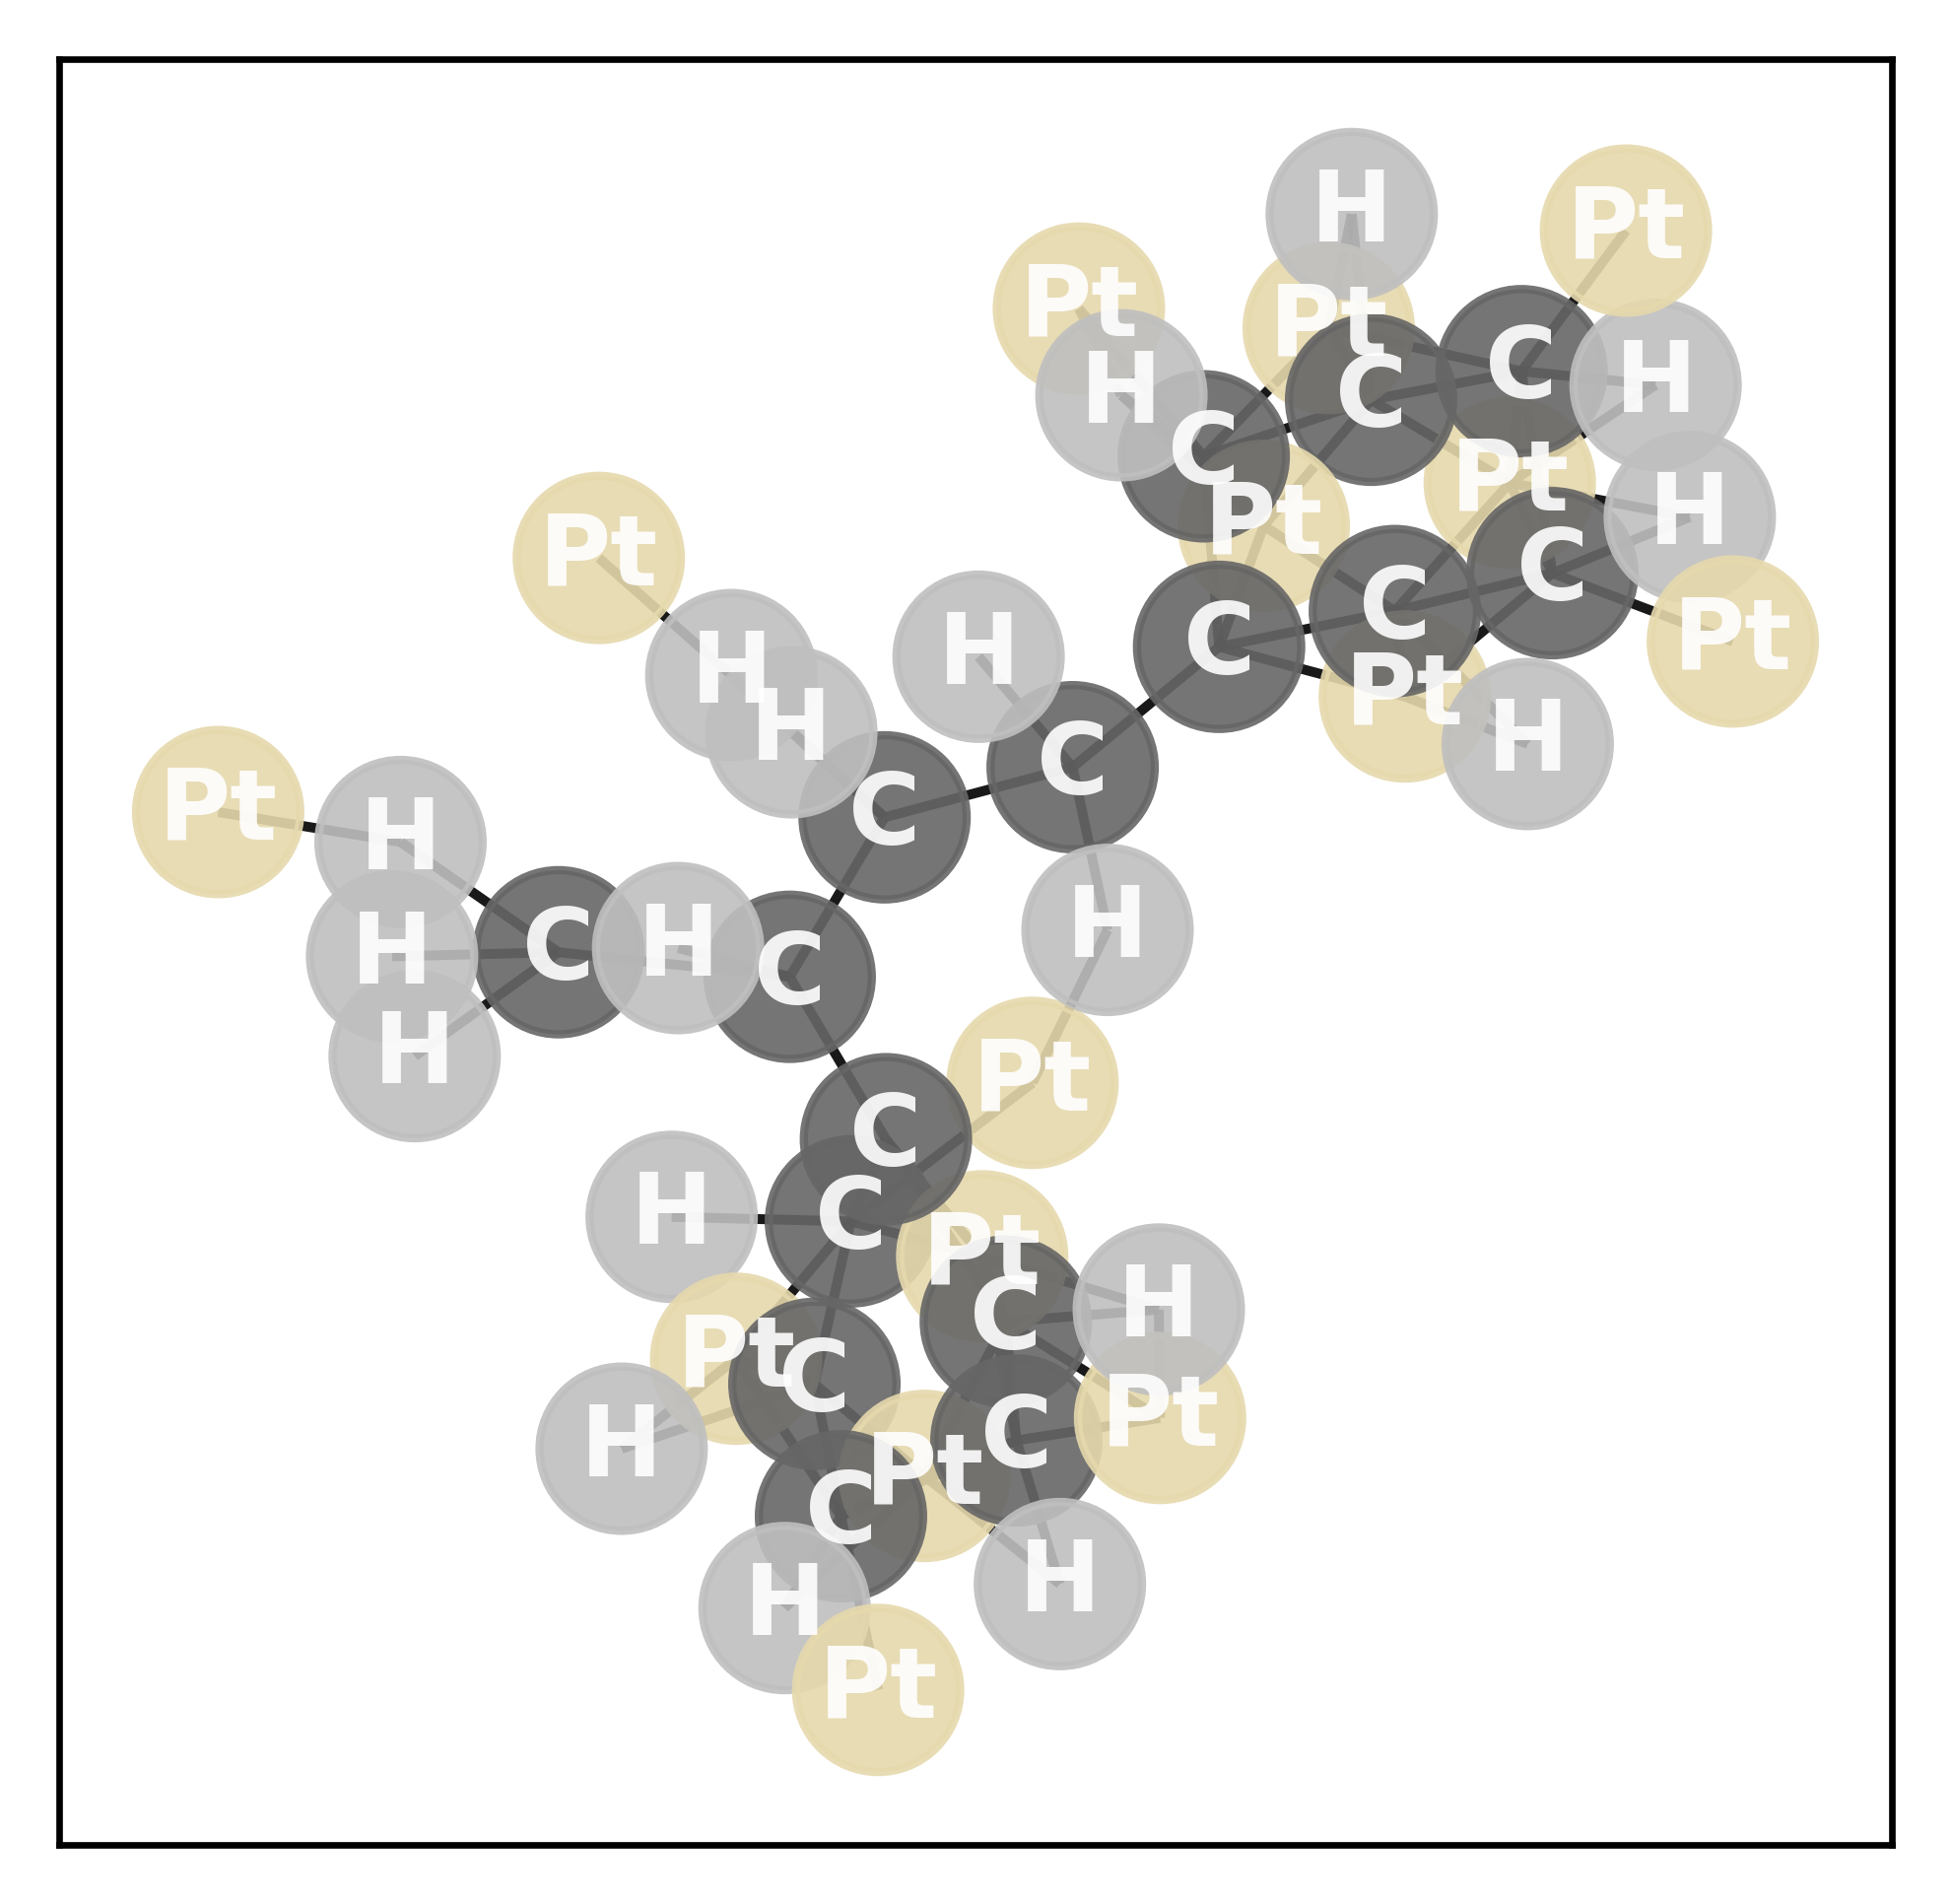

System: pt-PS
GNN energy = -215.03 eV 
VASP energy = -214.55030080000006 eV
Abs. Error = 0.48 eV
-----------------------------------


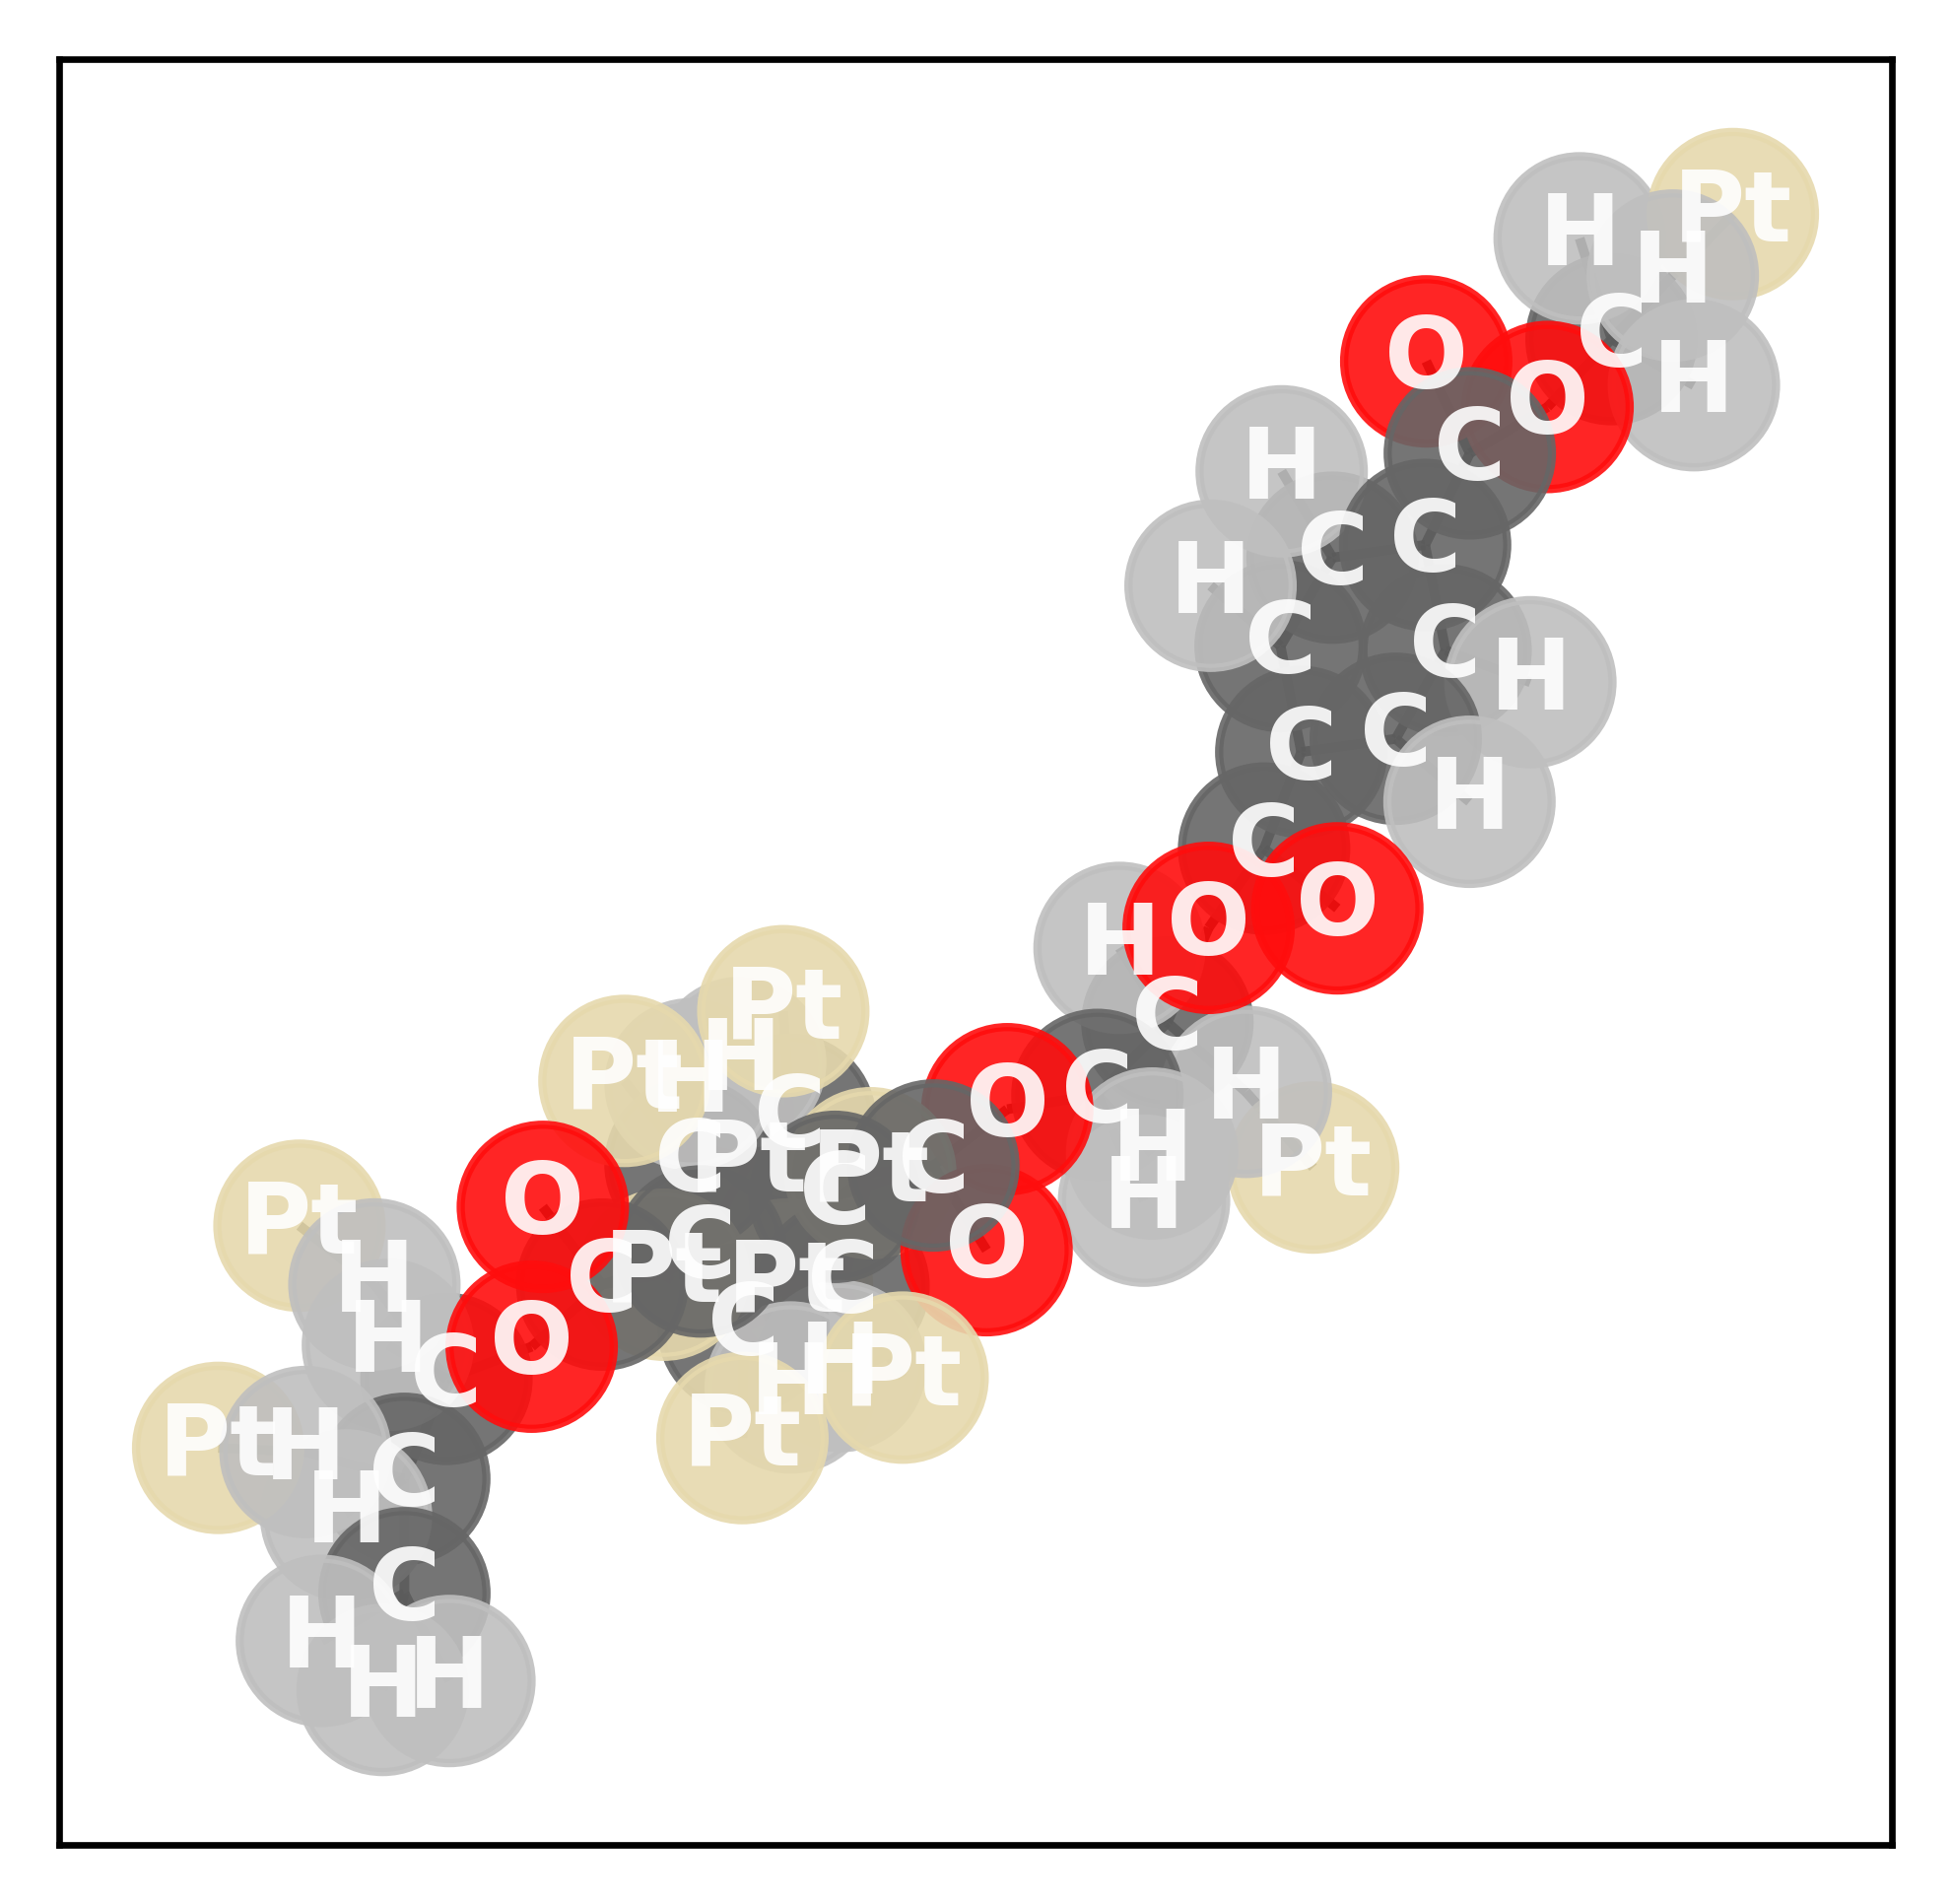

System: pt-PET
GNN energy = -335.69 eV 
VASP energy = -337.67323951000003 eV
Abs. Error = 1.98 eV
-----------------------------------


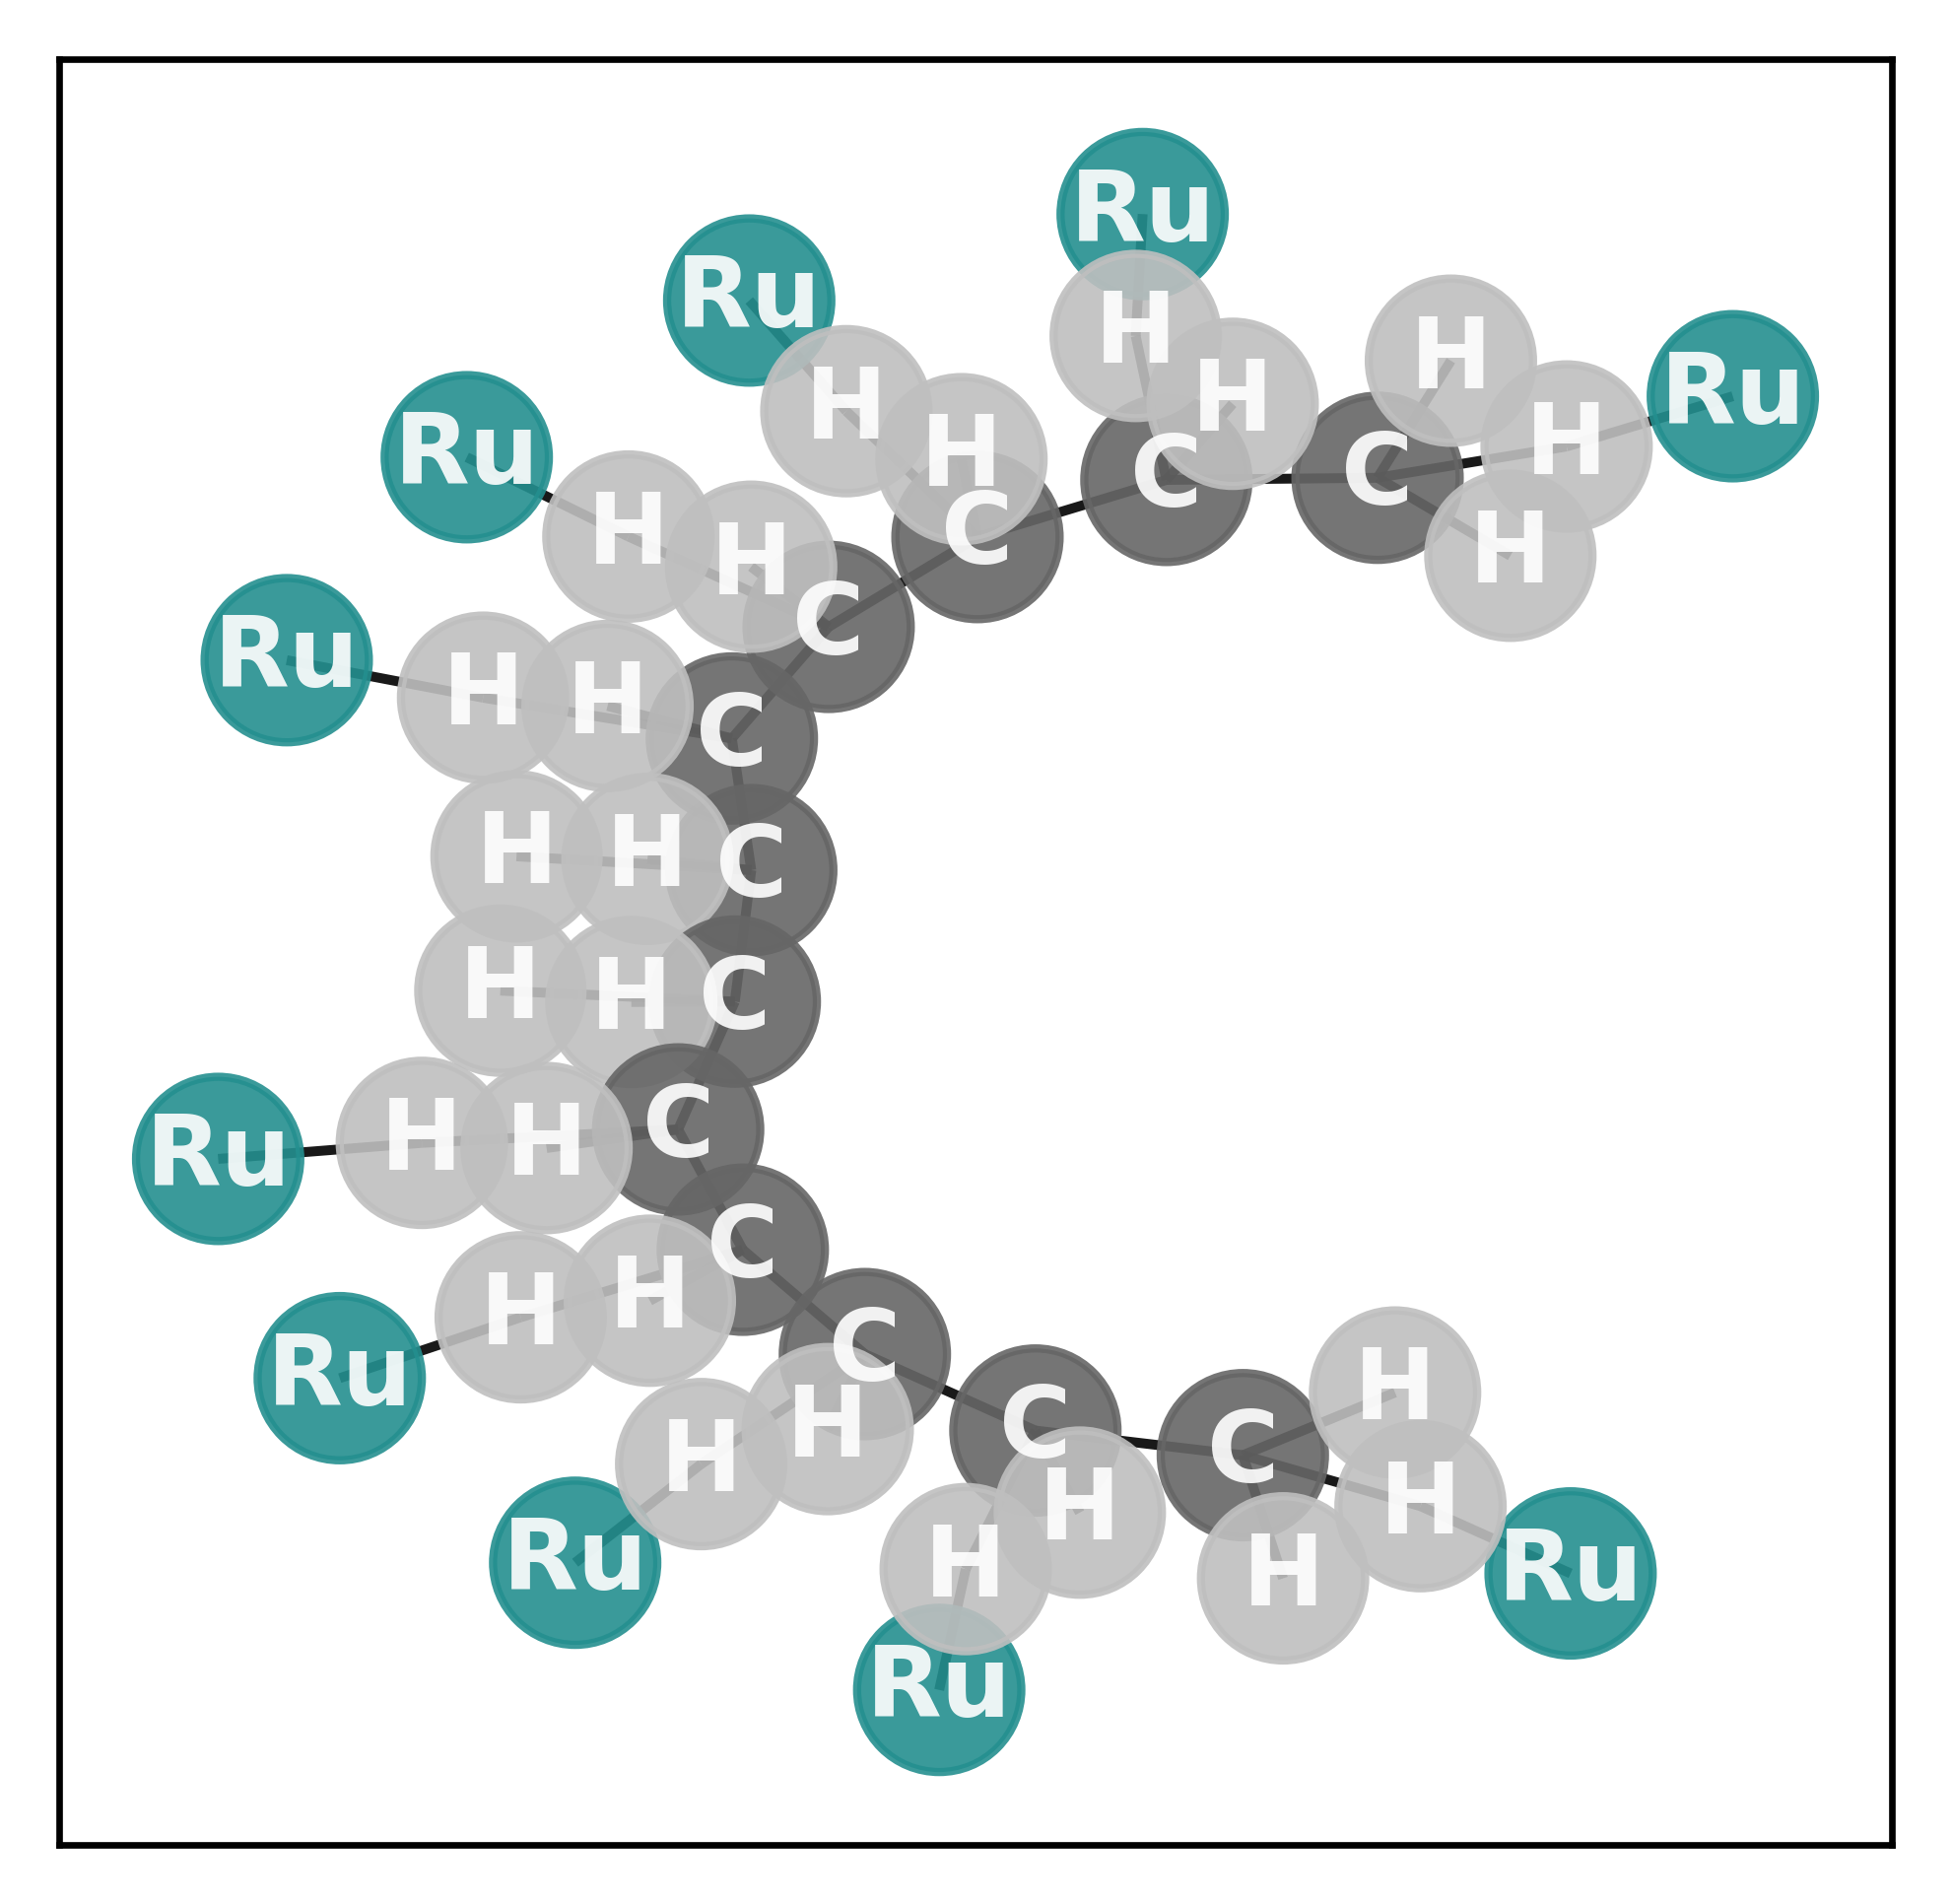

System: ru-PE
GNN energy = -206.39 eV 
VASP energy = -206.80057985000008 eV
Abs. Error = 0.41 eV
-----------------------------------


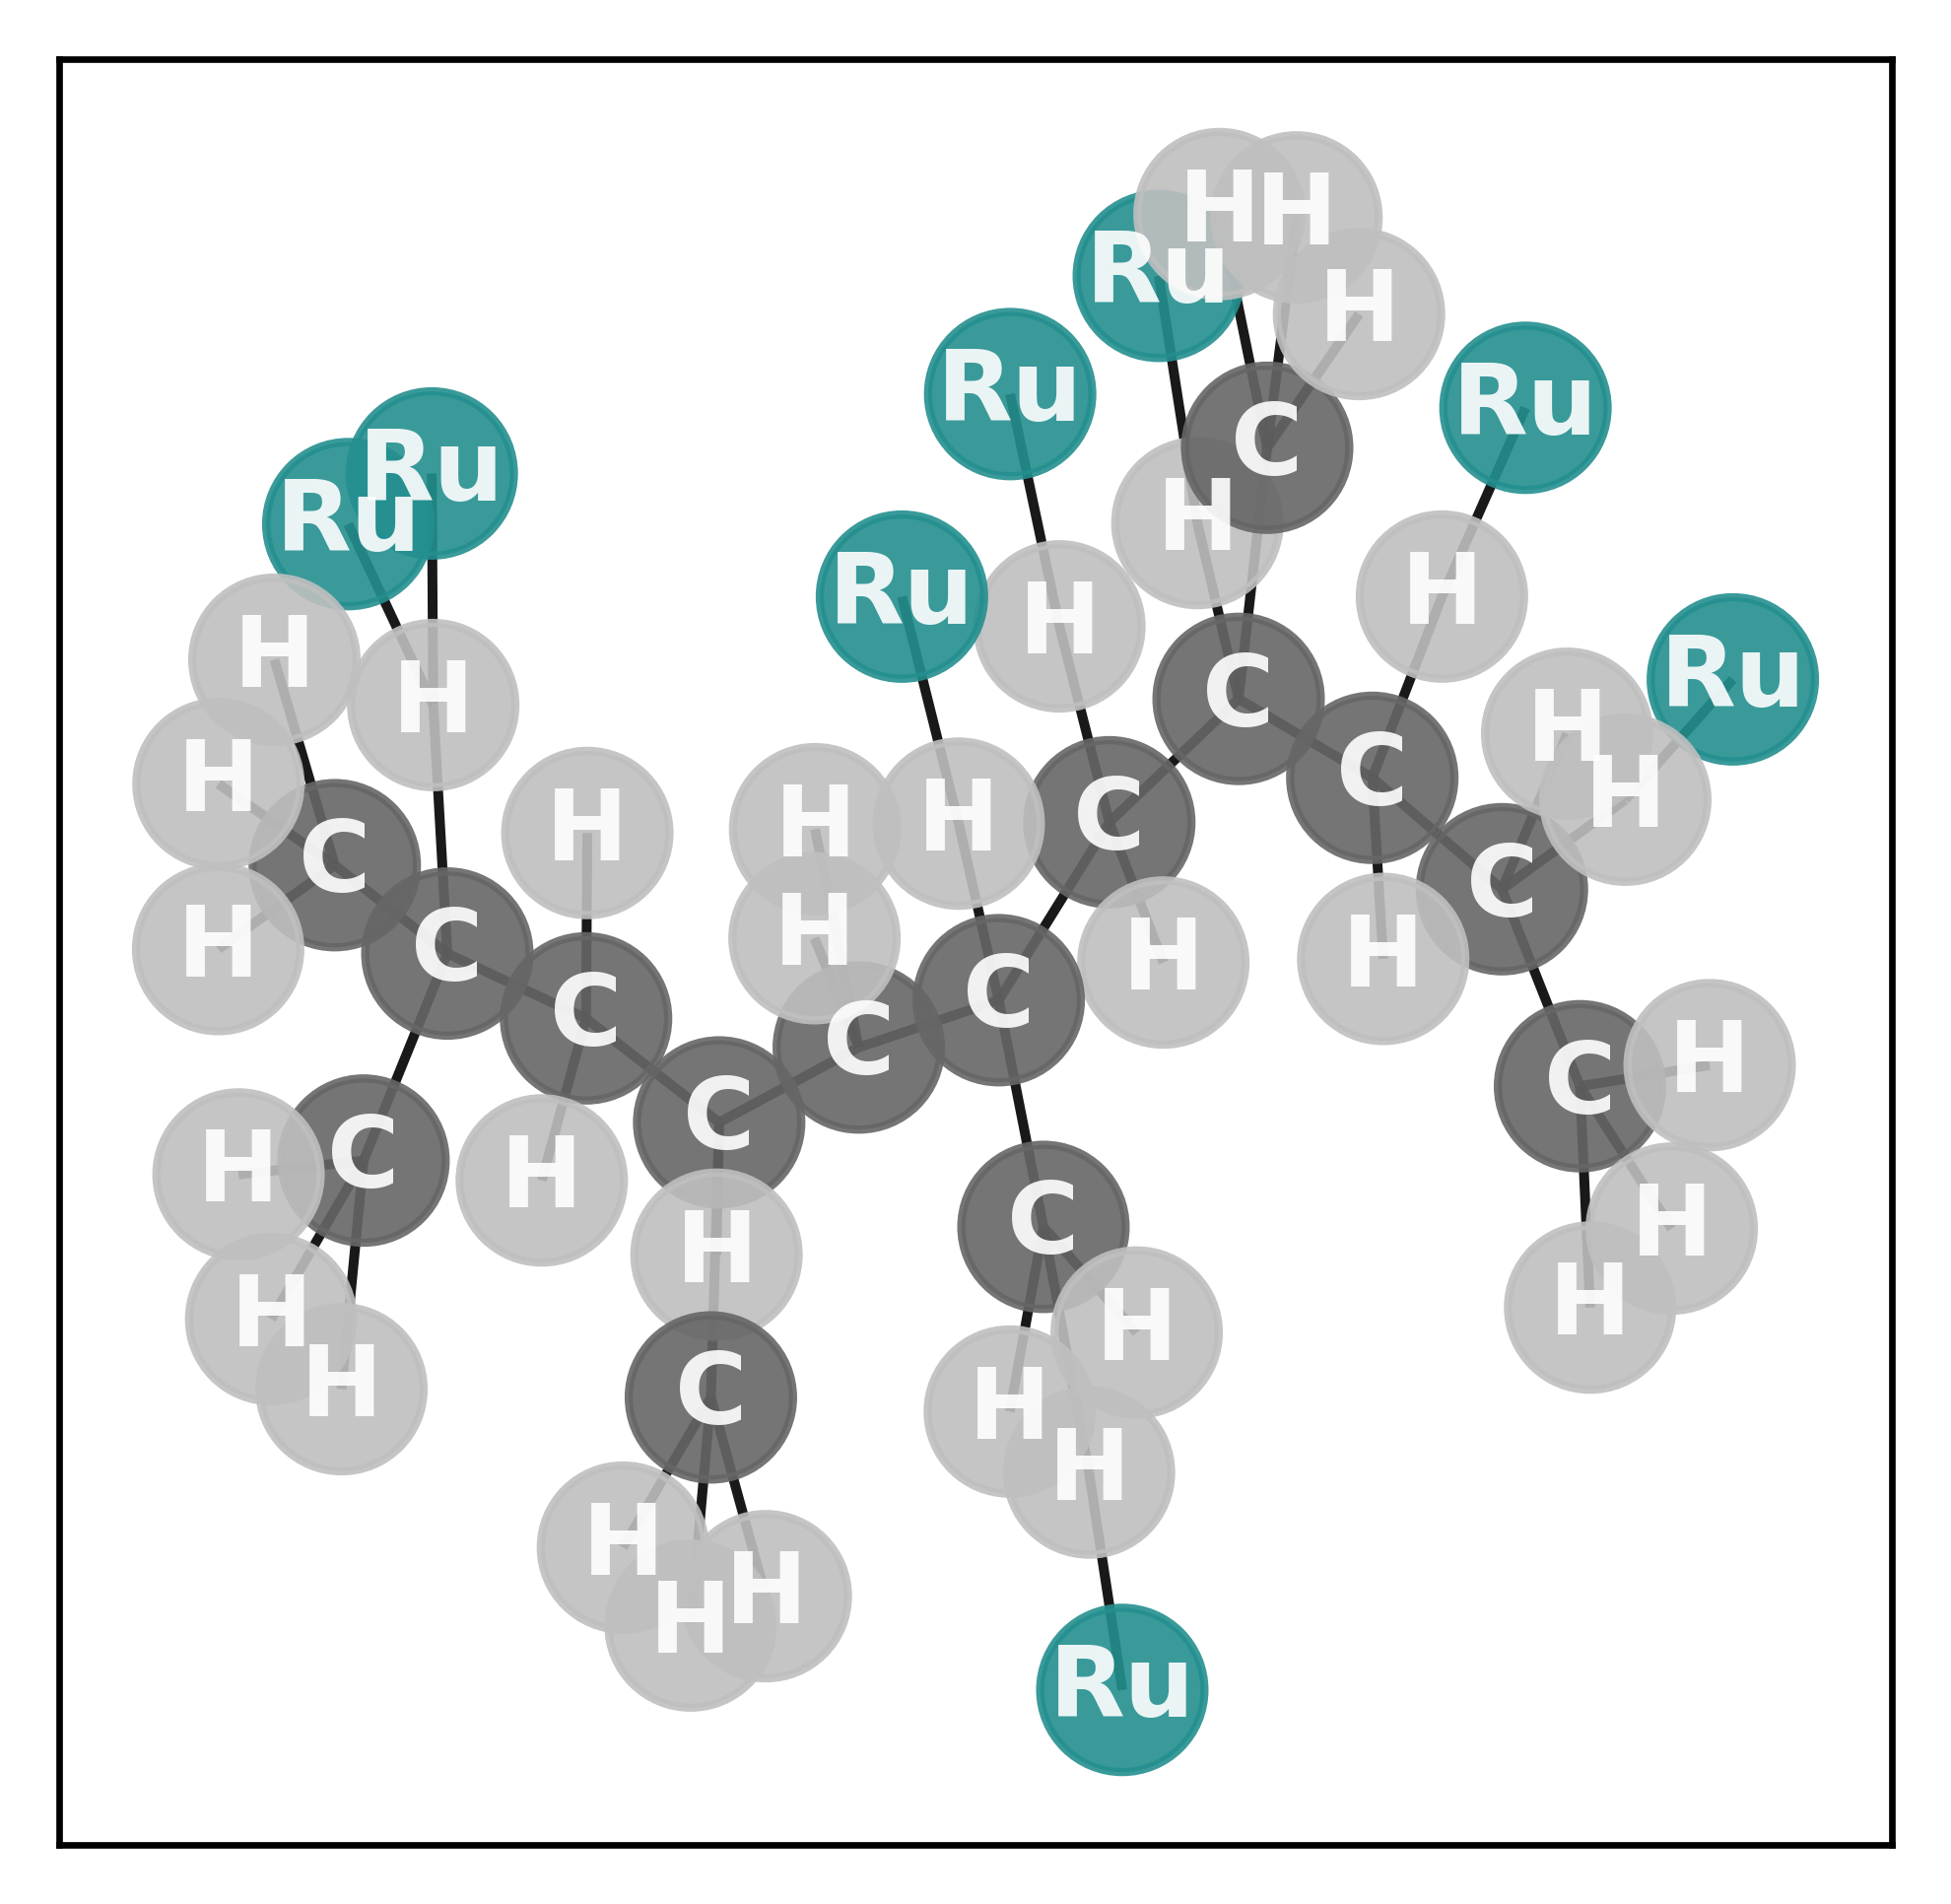

System: ru-PPit
GNN energy = -255.65 eV 
VASP energy = -256.22772469999995 eV
Abs. Error = 0.58 eV
-----------------------------------


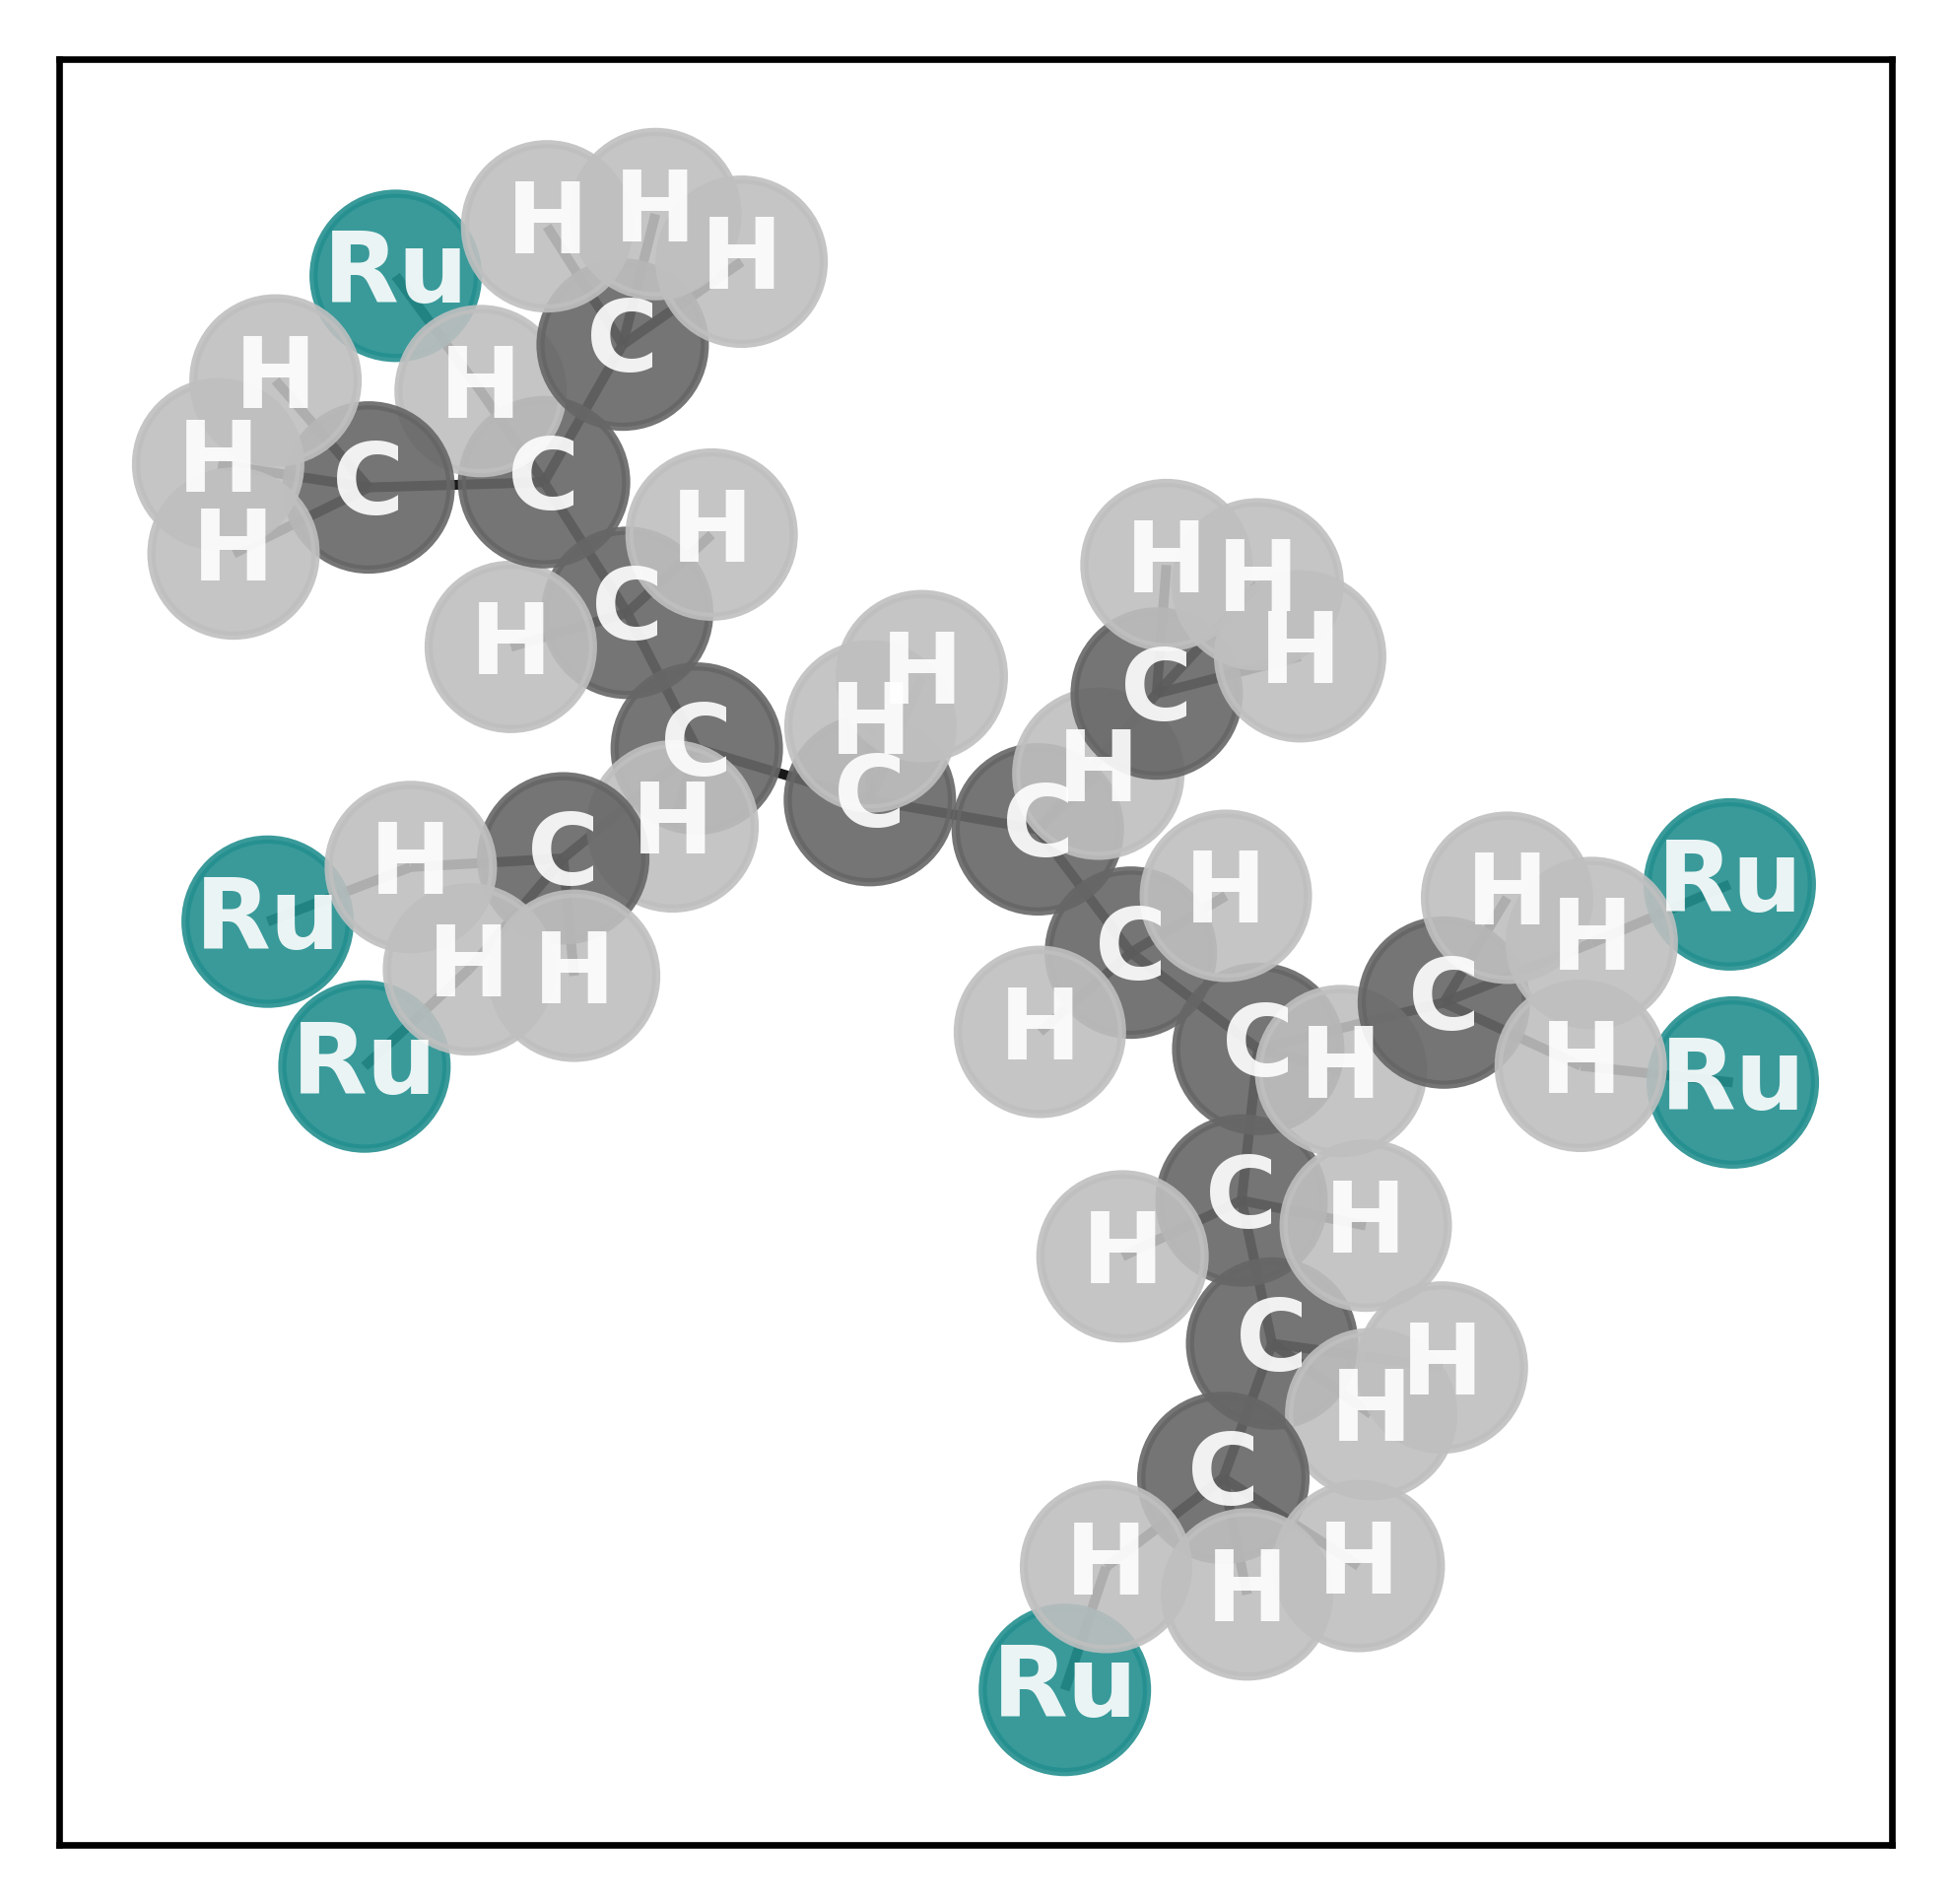

System: ru-PPst
GNN energy = -255.84 eV 
VASP energy = -256.53262309 eV
Abs. Error = 0.69 eV
-----------------------------------


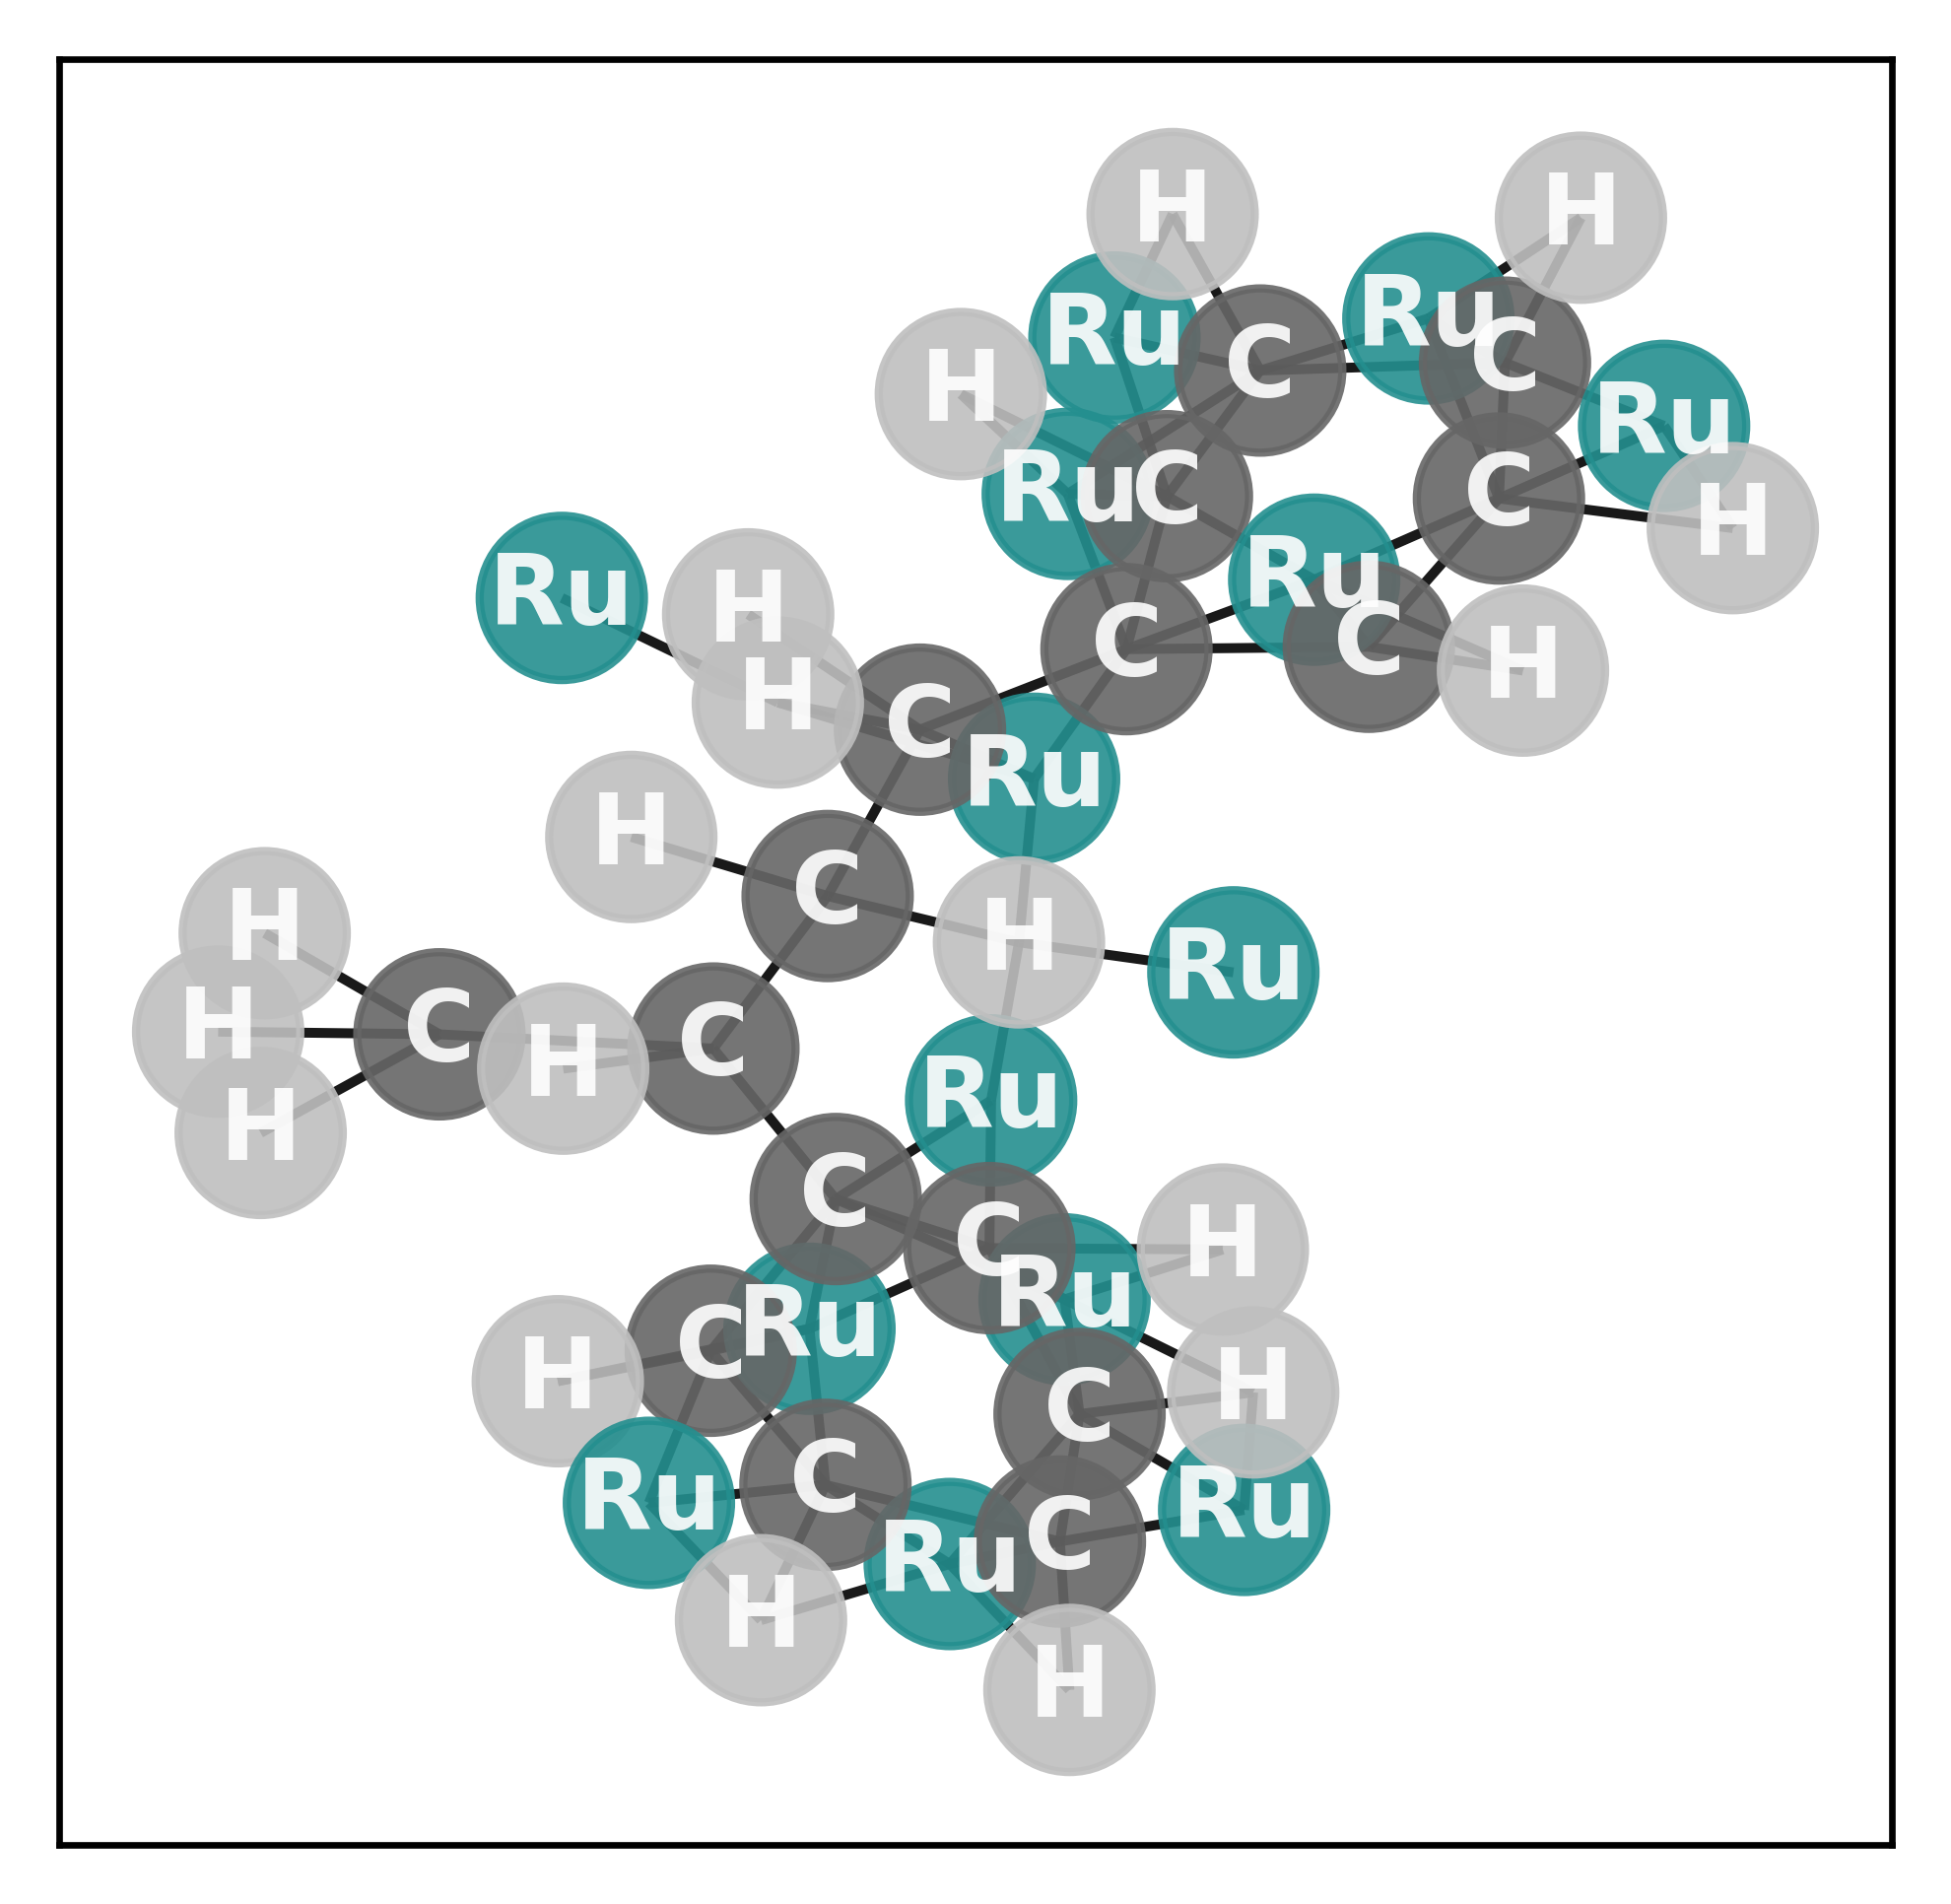

System: ru-PS
GNN energy = -215.09 eV 
VASP energy = -214.70236036000006 eV
Abs. Error = 0.38 eV
-----------------------------------


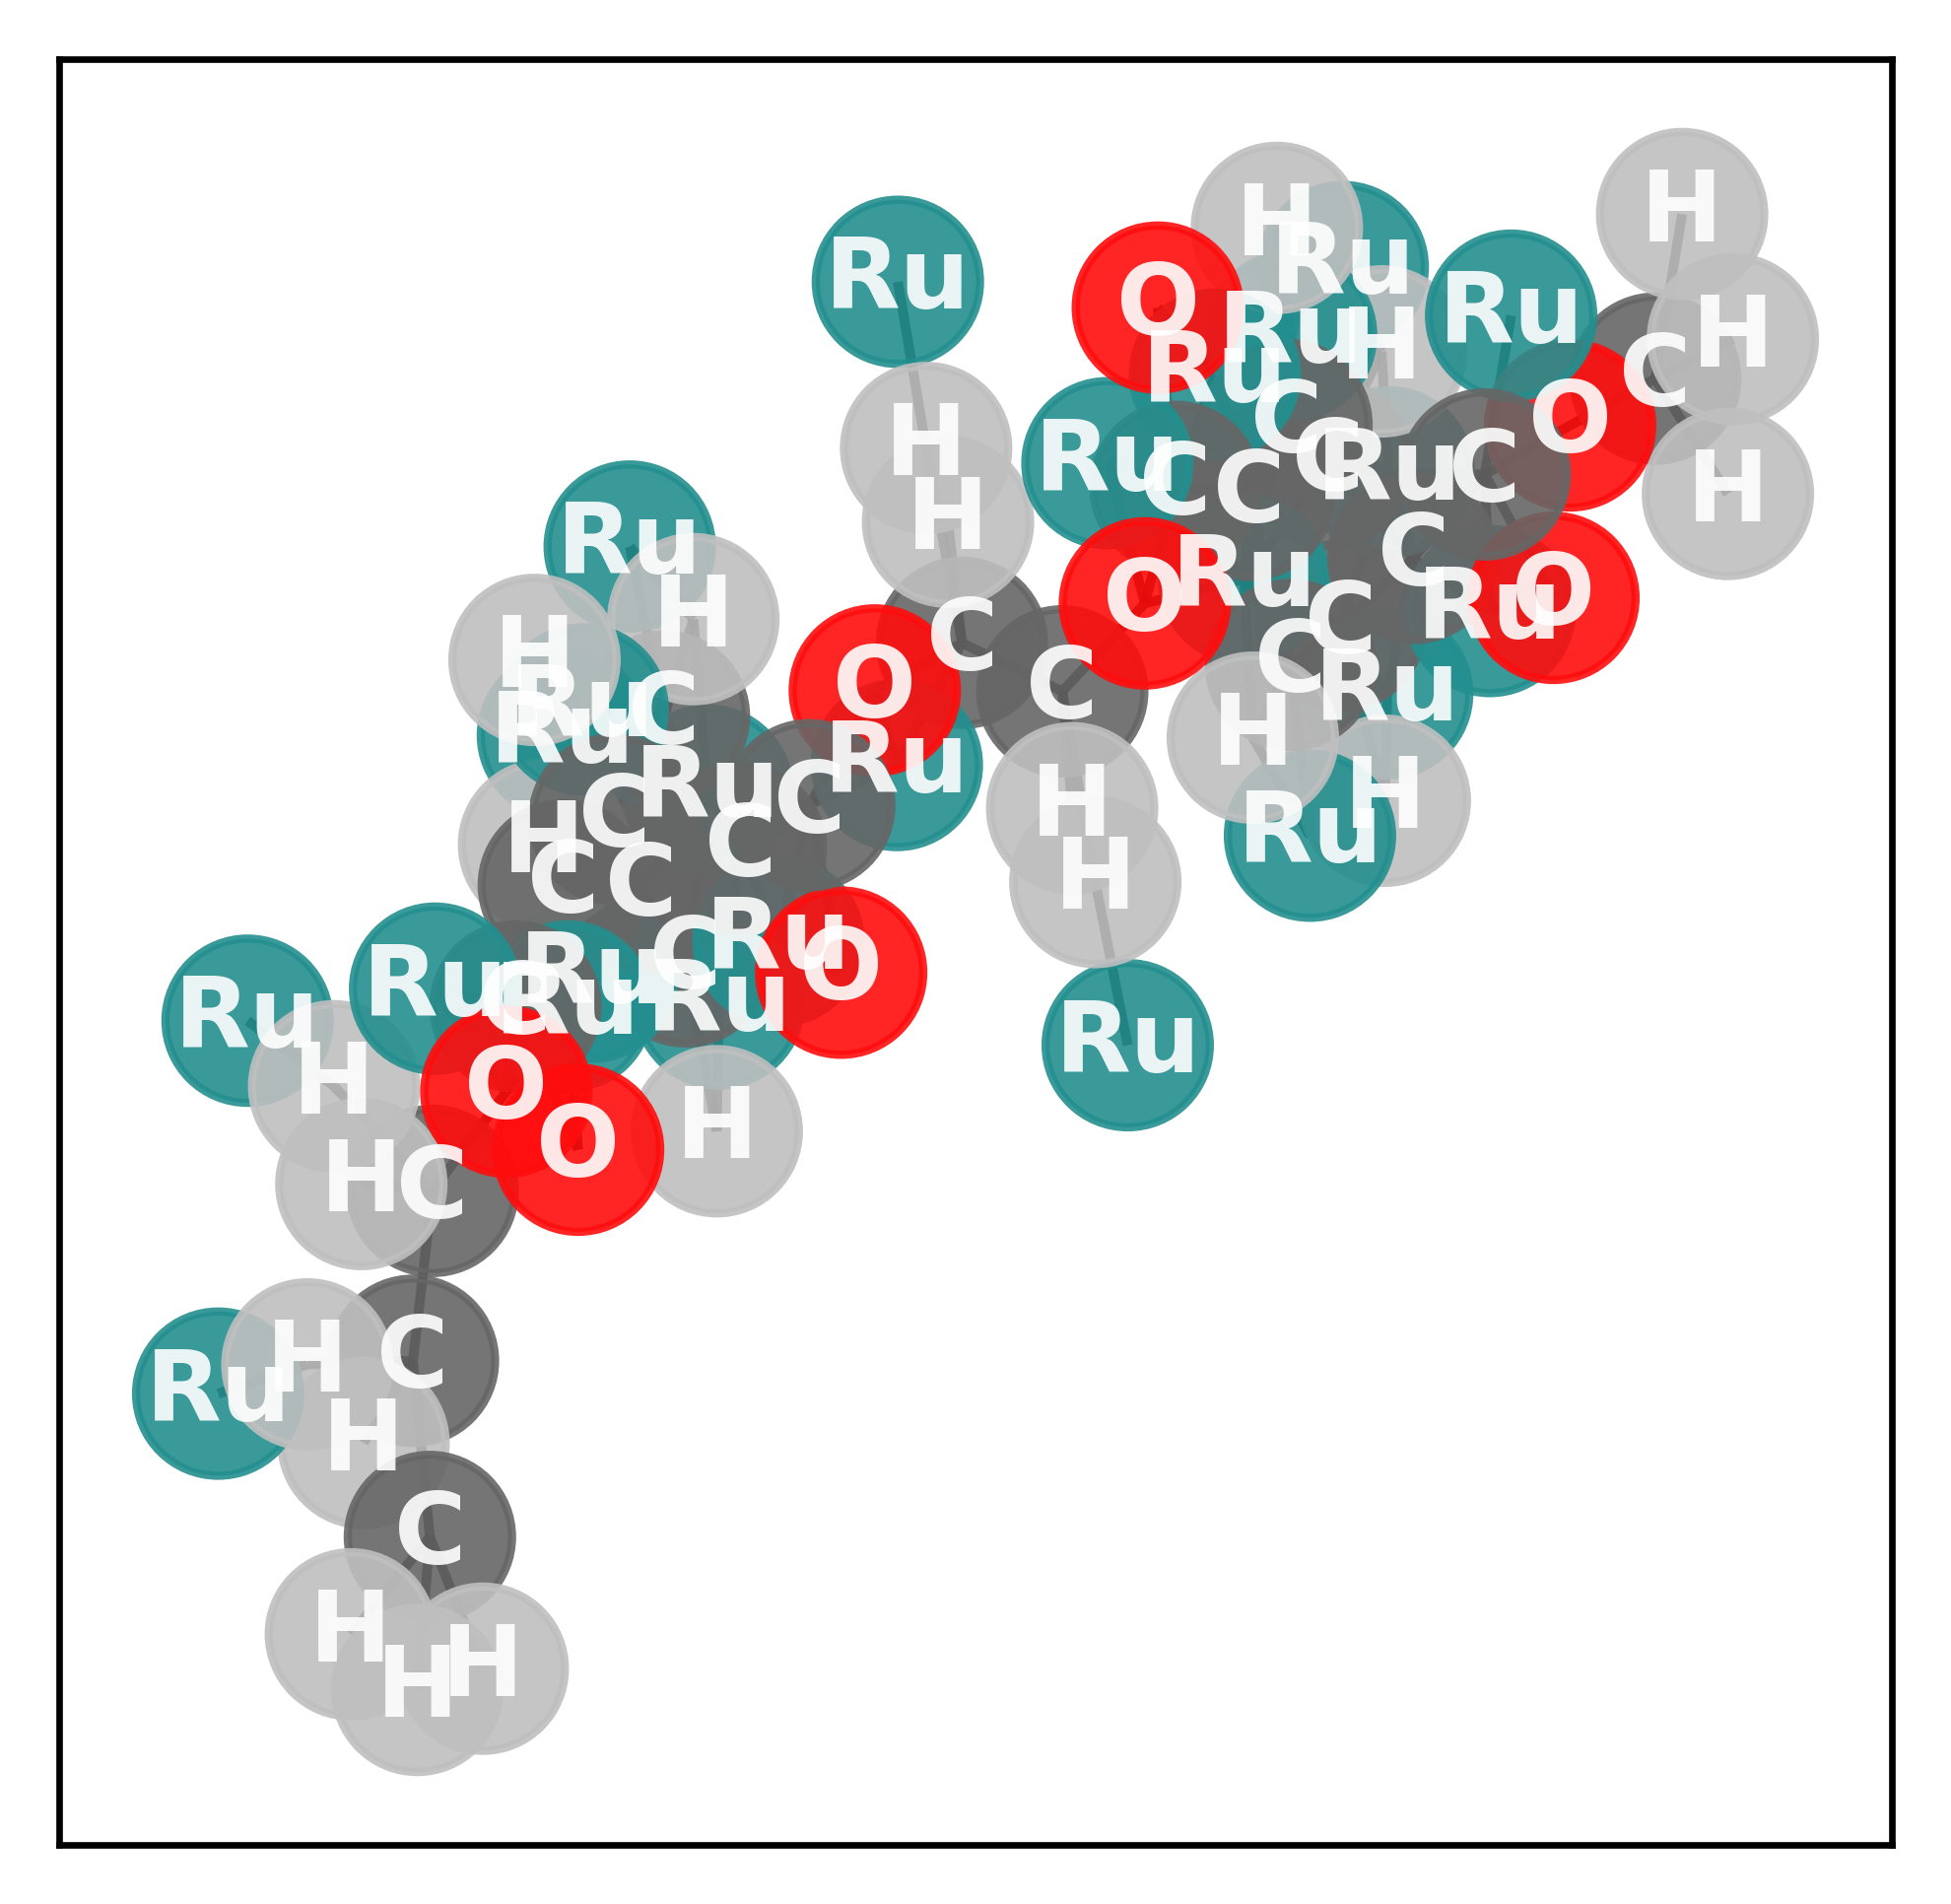

System: ru-PET
GNN energy = -337.96 eV 
VASP energy = -339.5979853900001 eV
Abs. Error = 1.64 eV
-----------------------------------


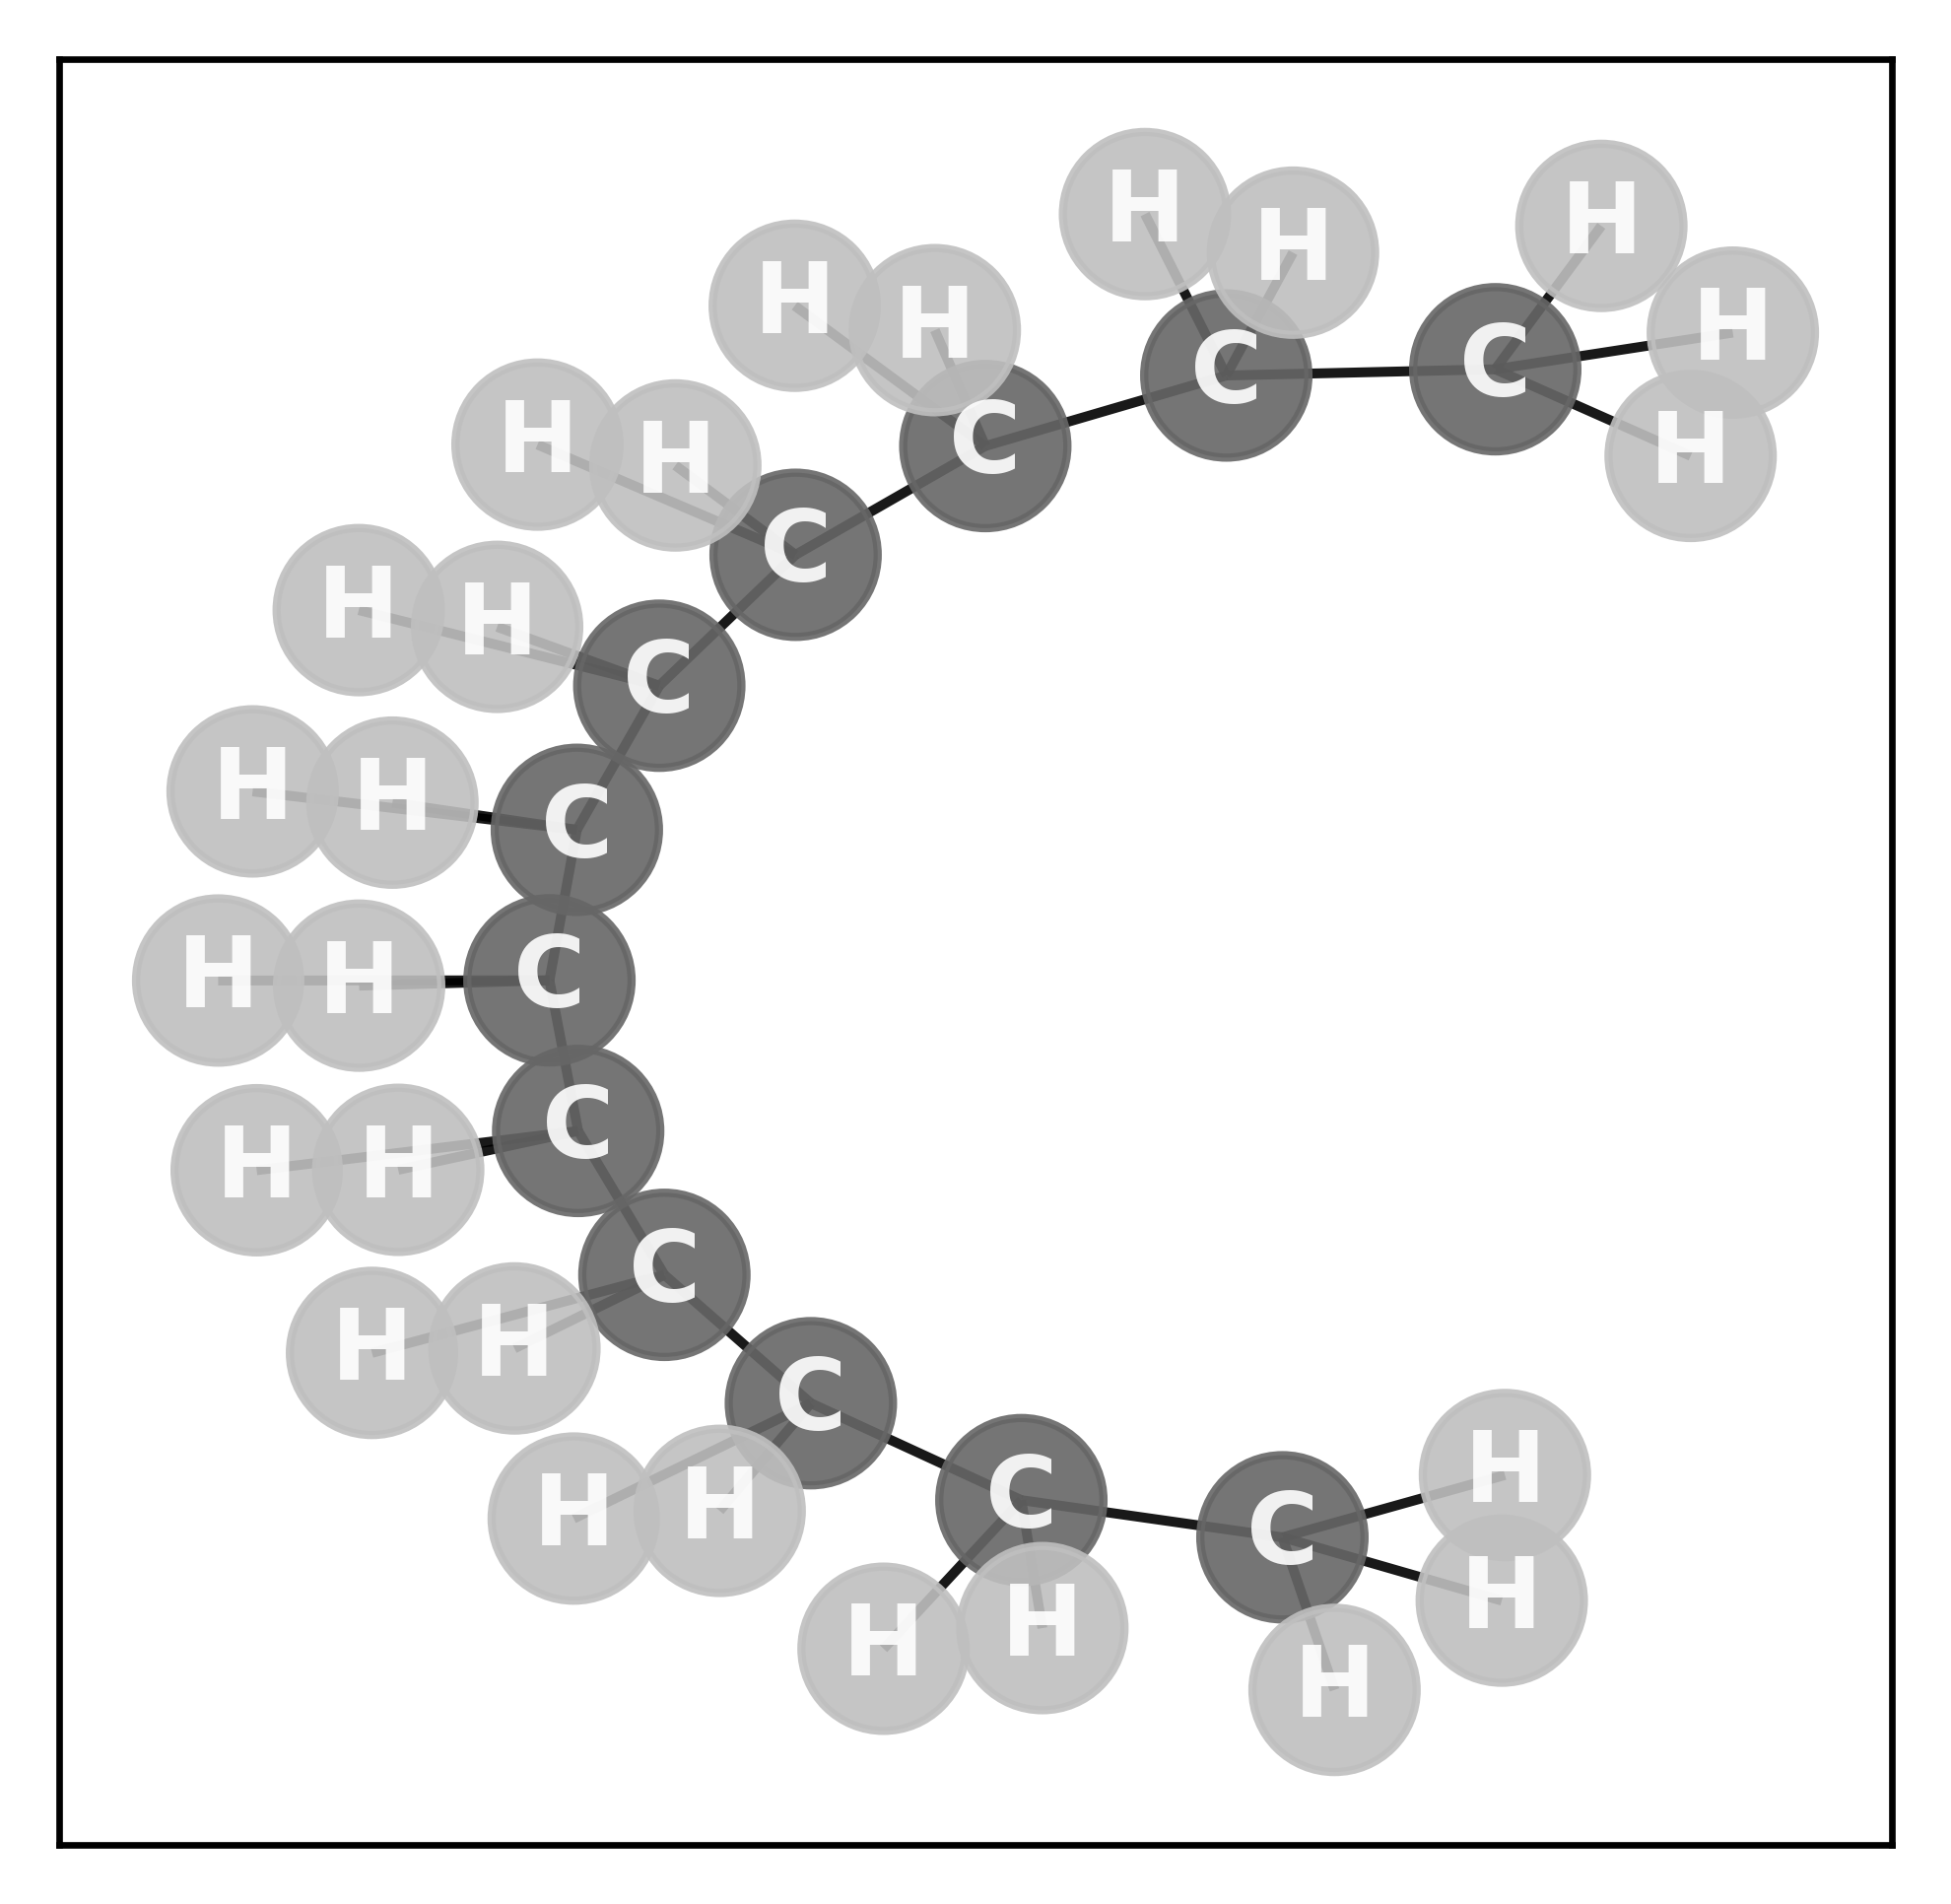

System: PE
GNN energy = -206.35 eV 
VASP energy = -206.61948565 eV
Abs. Error = 0.27 eV
-----------------------------------


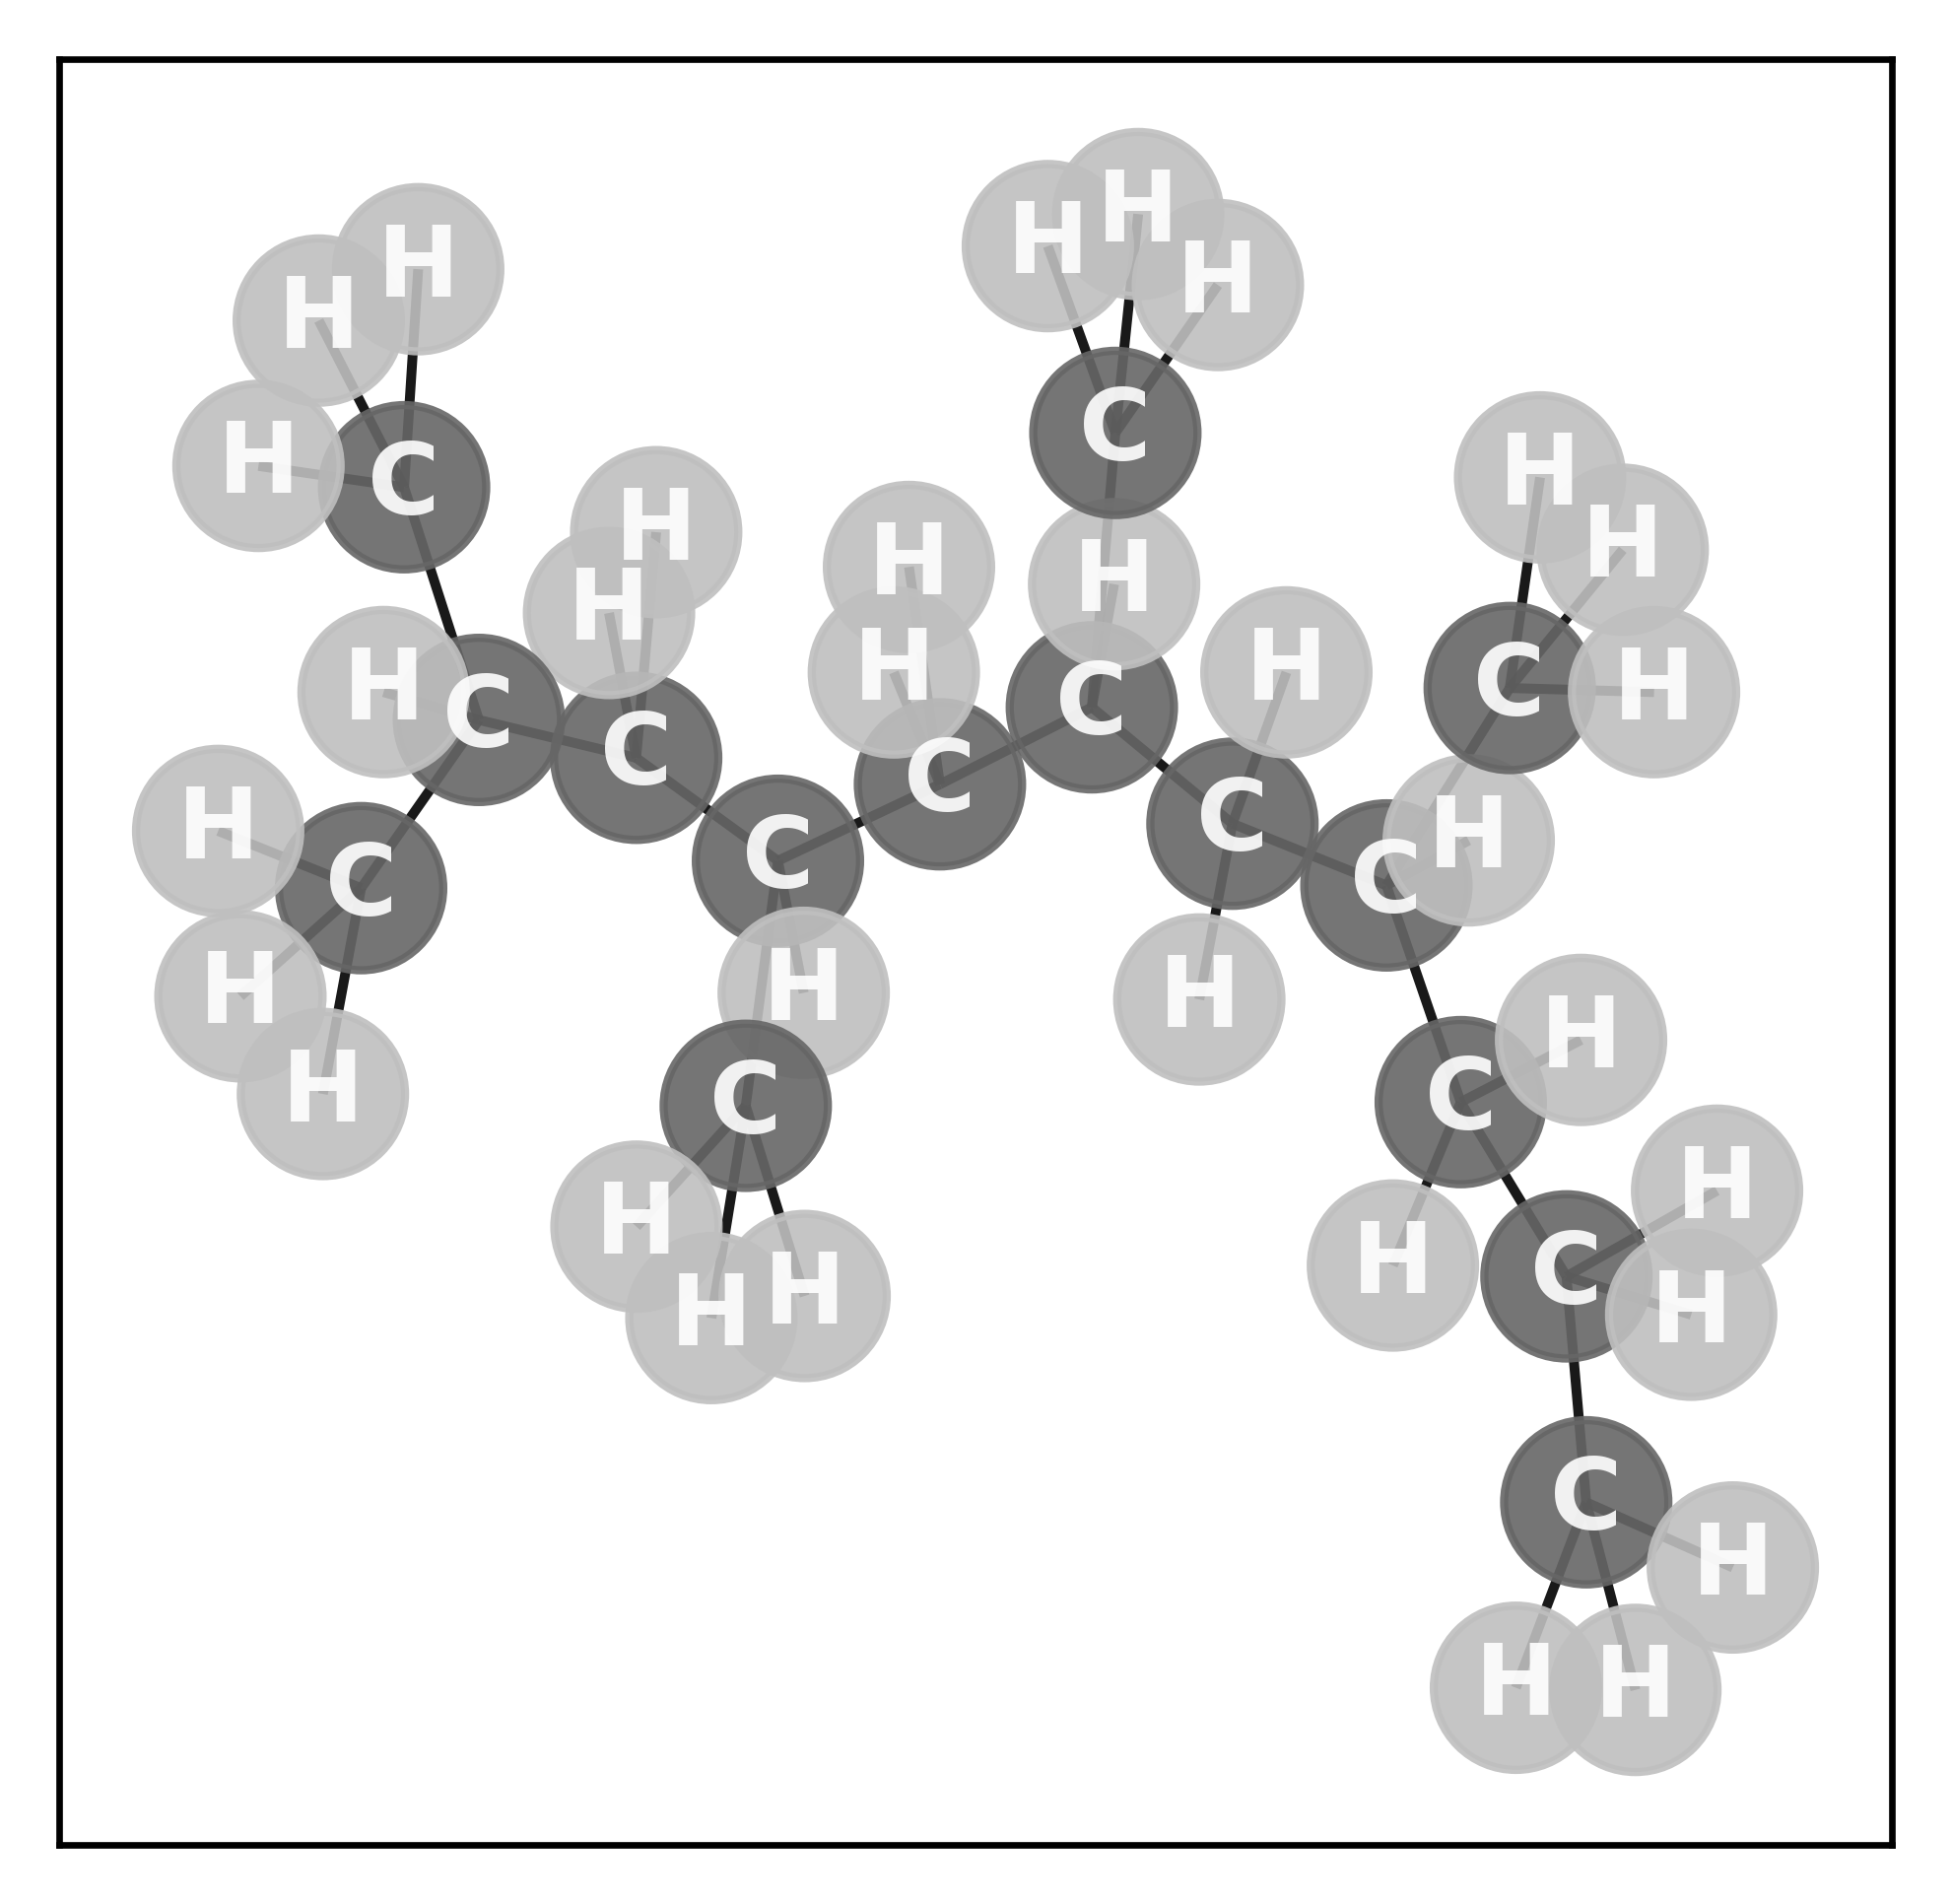

System: PPit
GNN energy = -255.80 eV 
VASP energy = -256.25239953 eV
Abs. Error = 0.45 eV
-----------------------------------


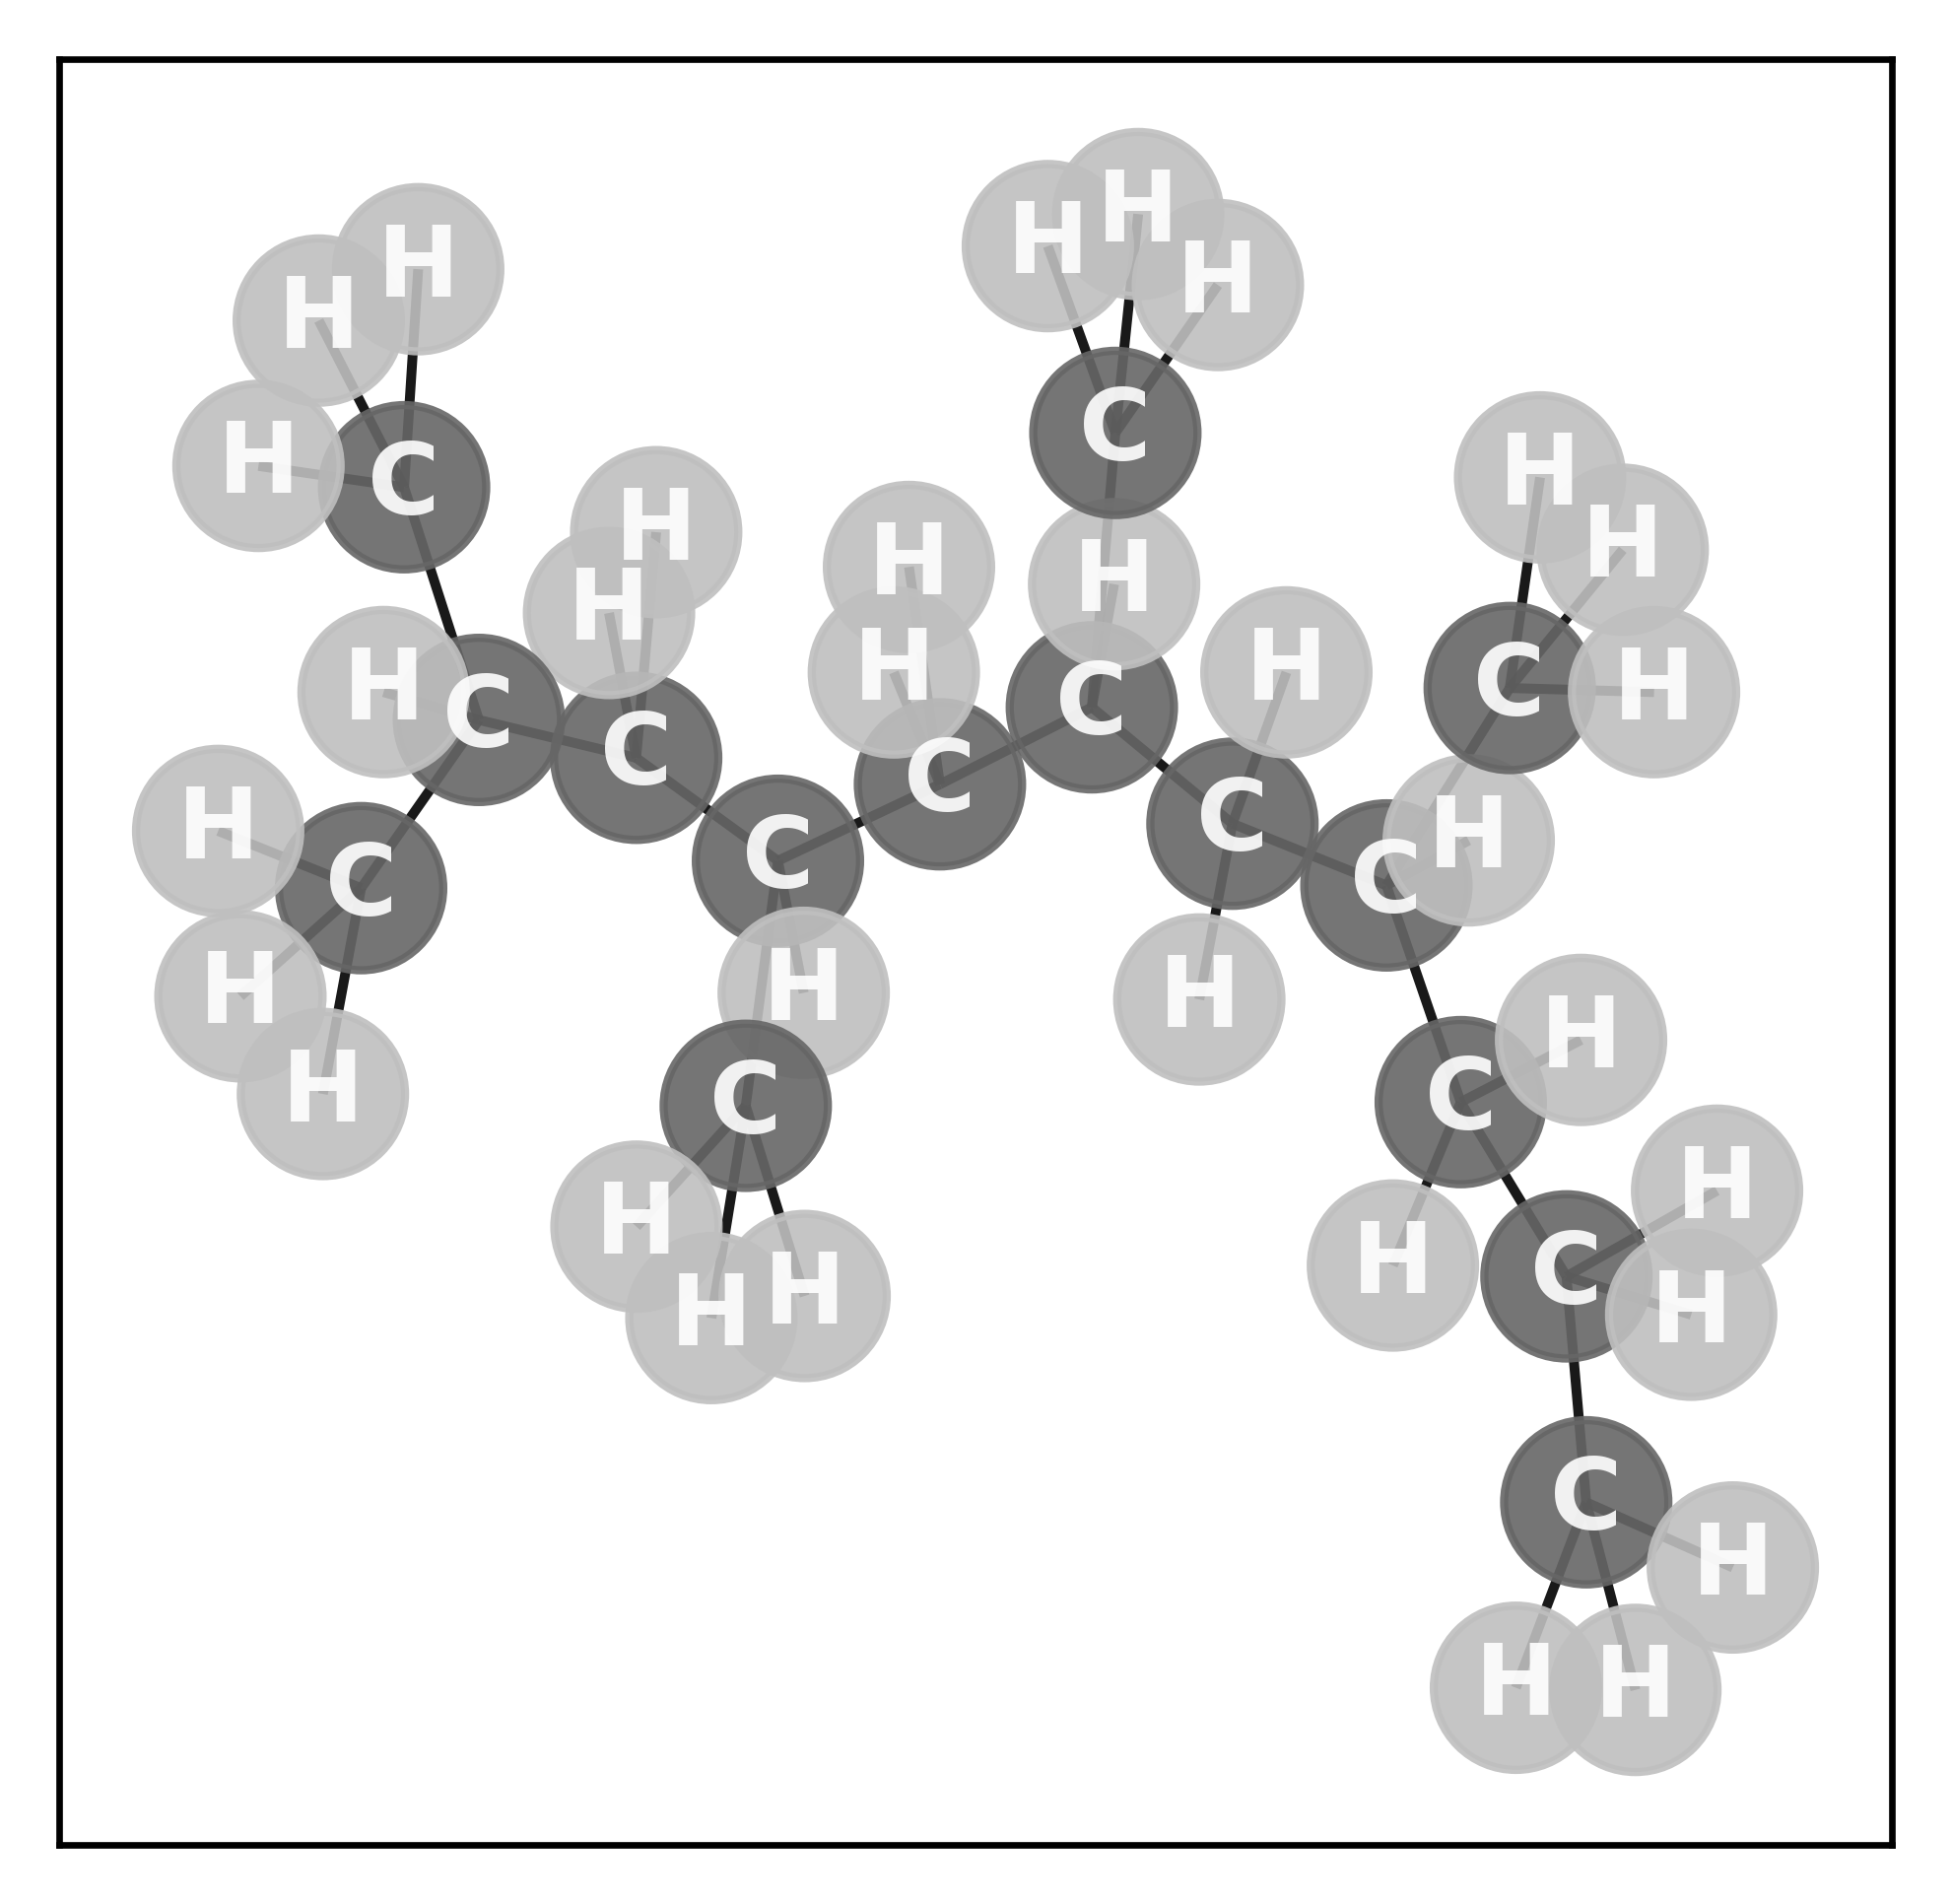

System: PPst
GNN energy = -255.80 eV 
VASP energy = -256.61073717 eV
Abs. Error = 0.81 eV
-----------------------------------


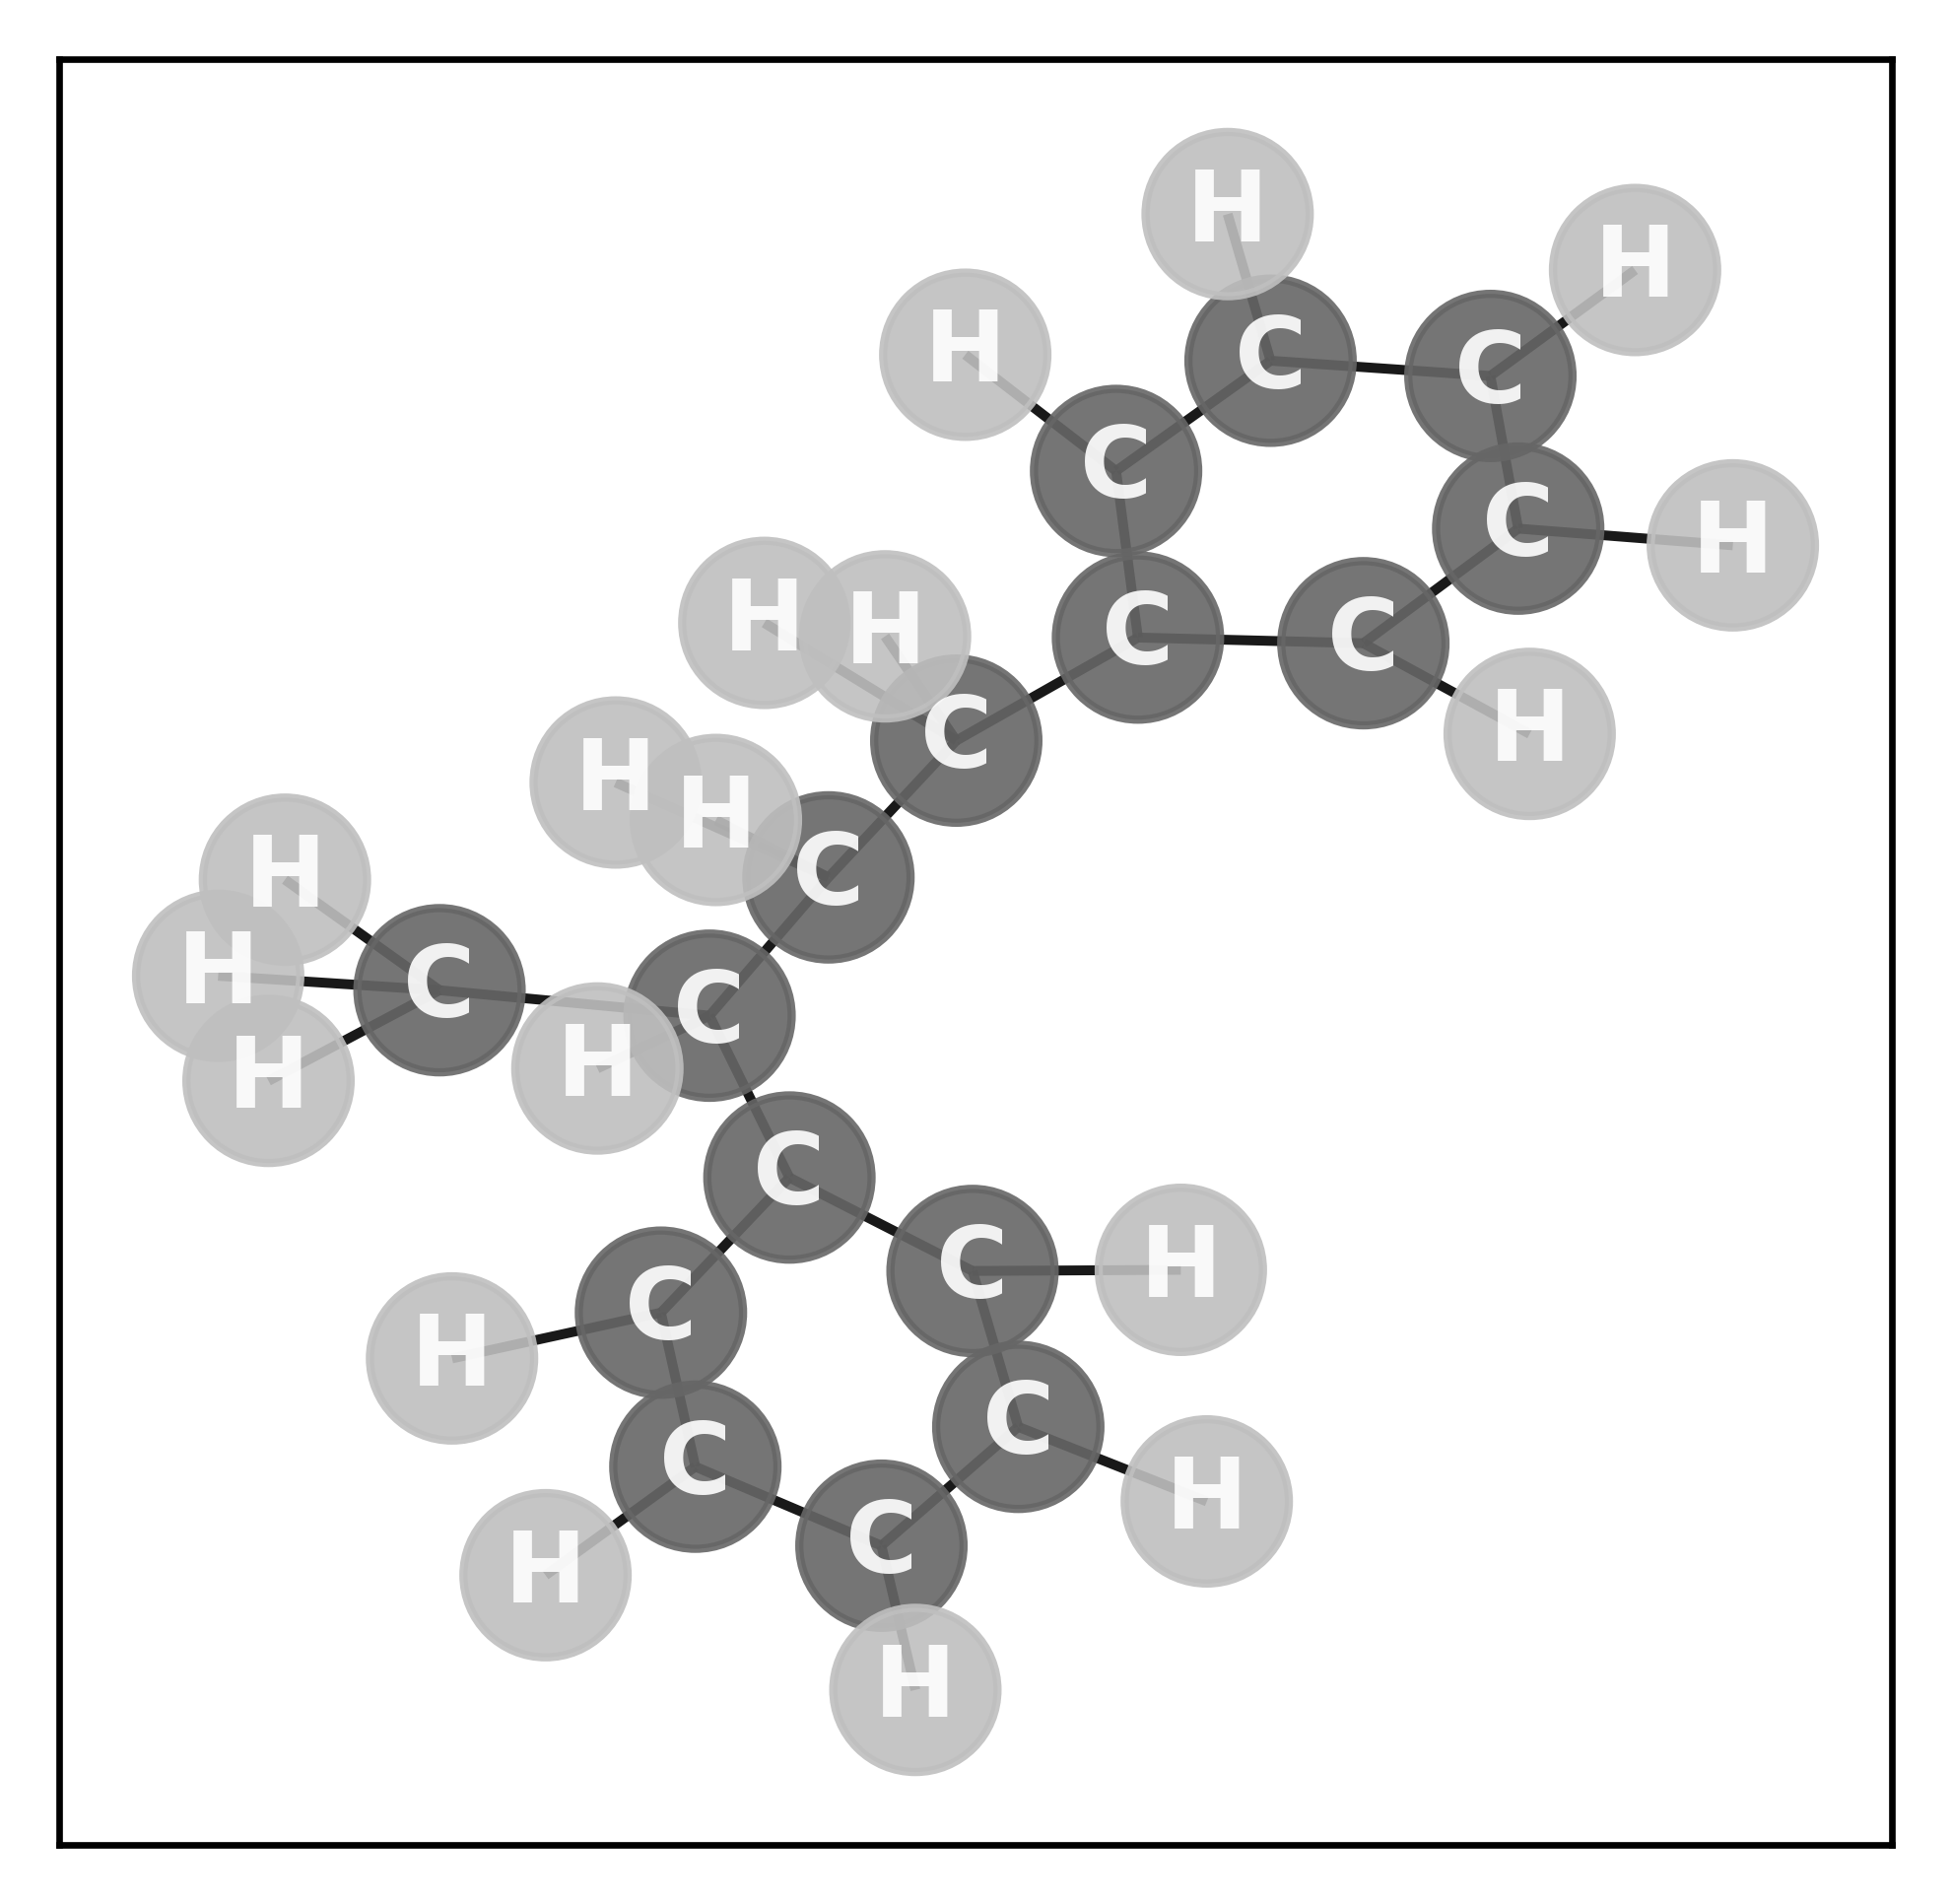

System: PS
GNN energy = -211.62 eV 
VASP energy = -211.59859686 eV
Abs. Error = 0.02 eV
-----------------------------------


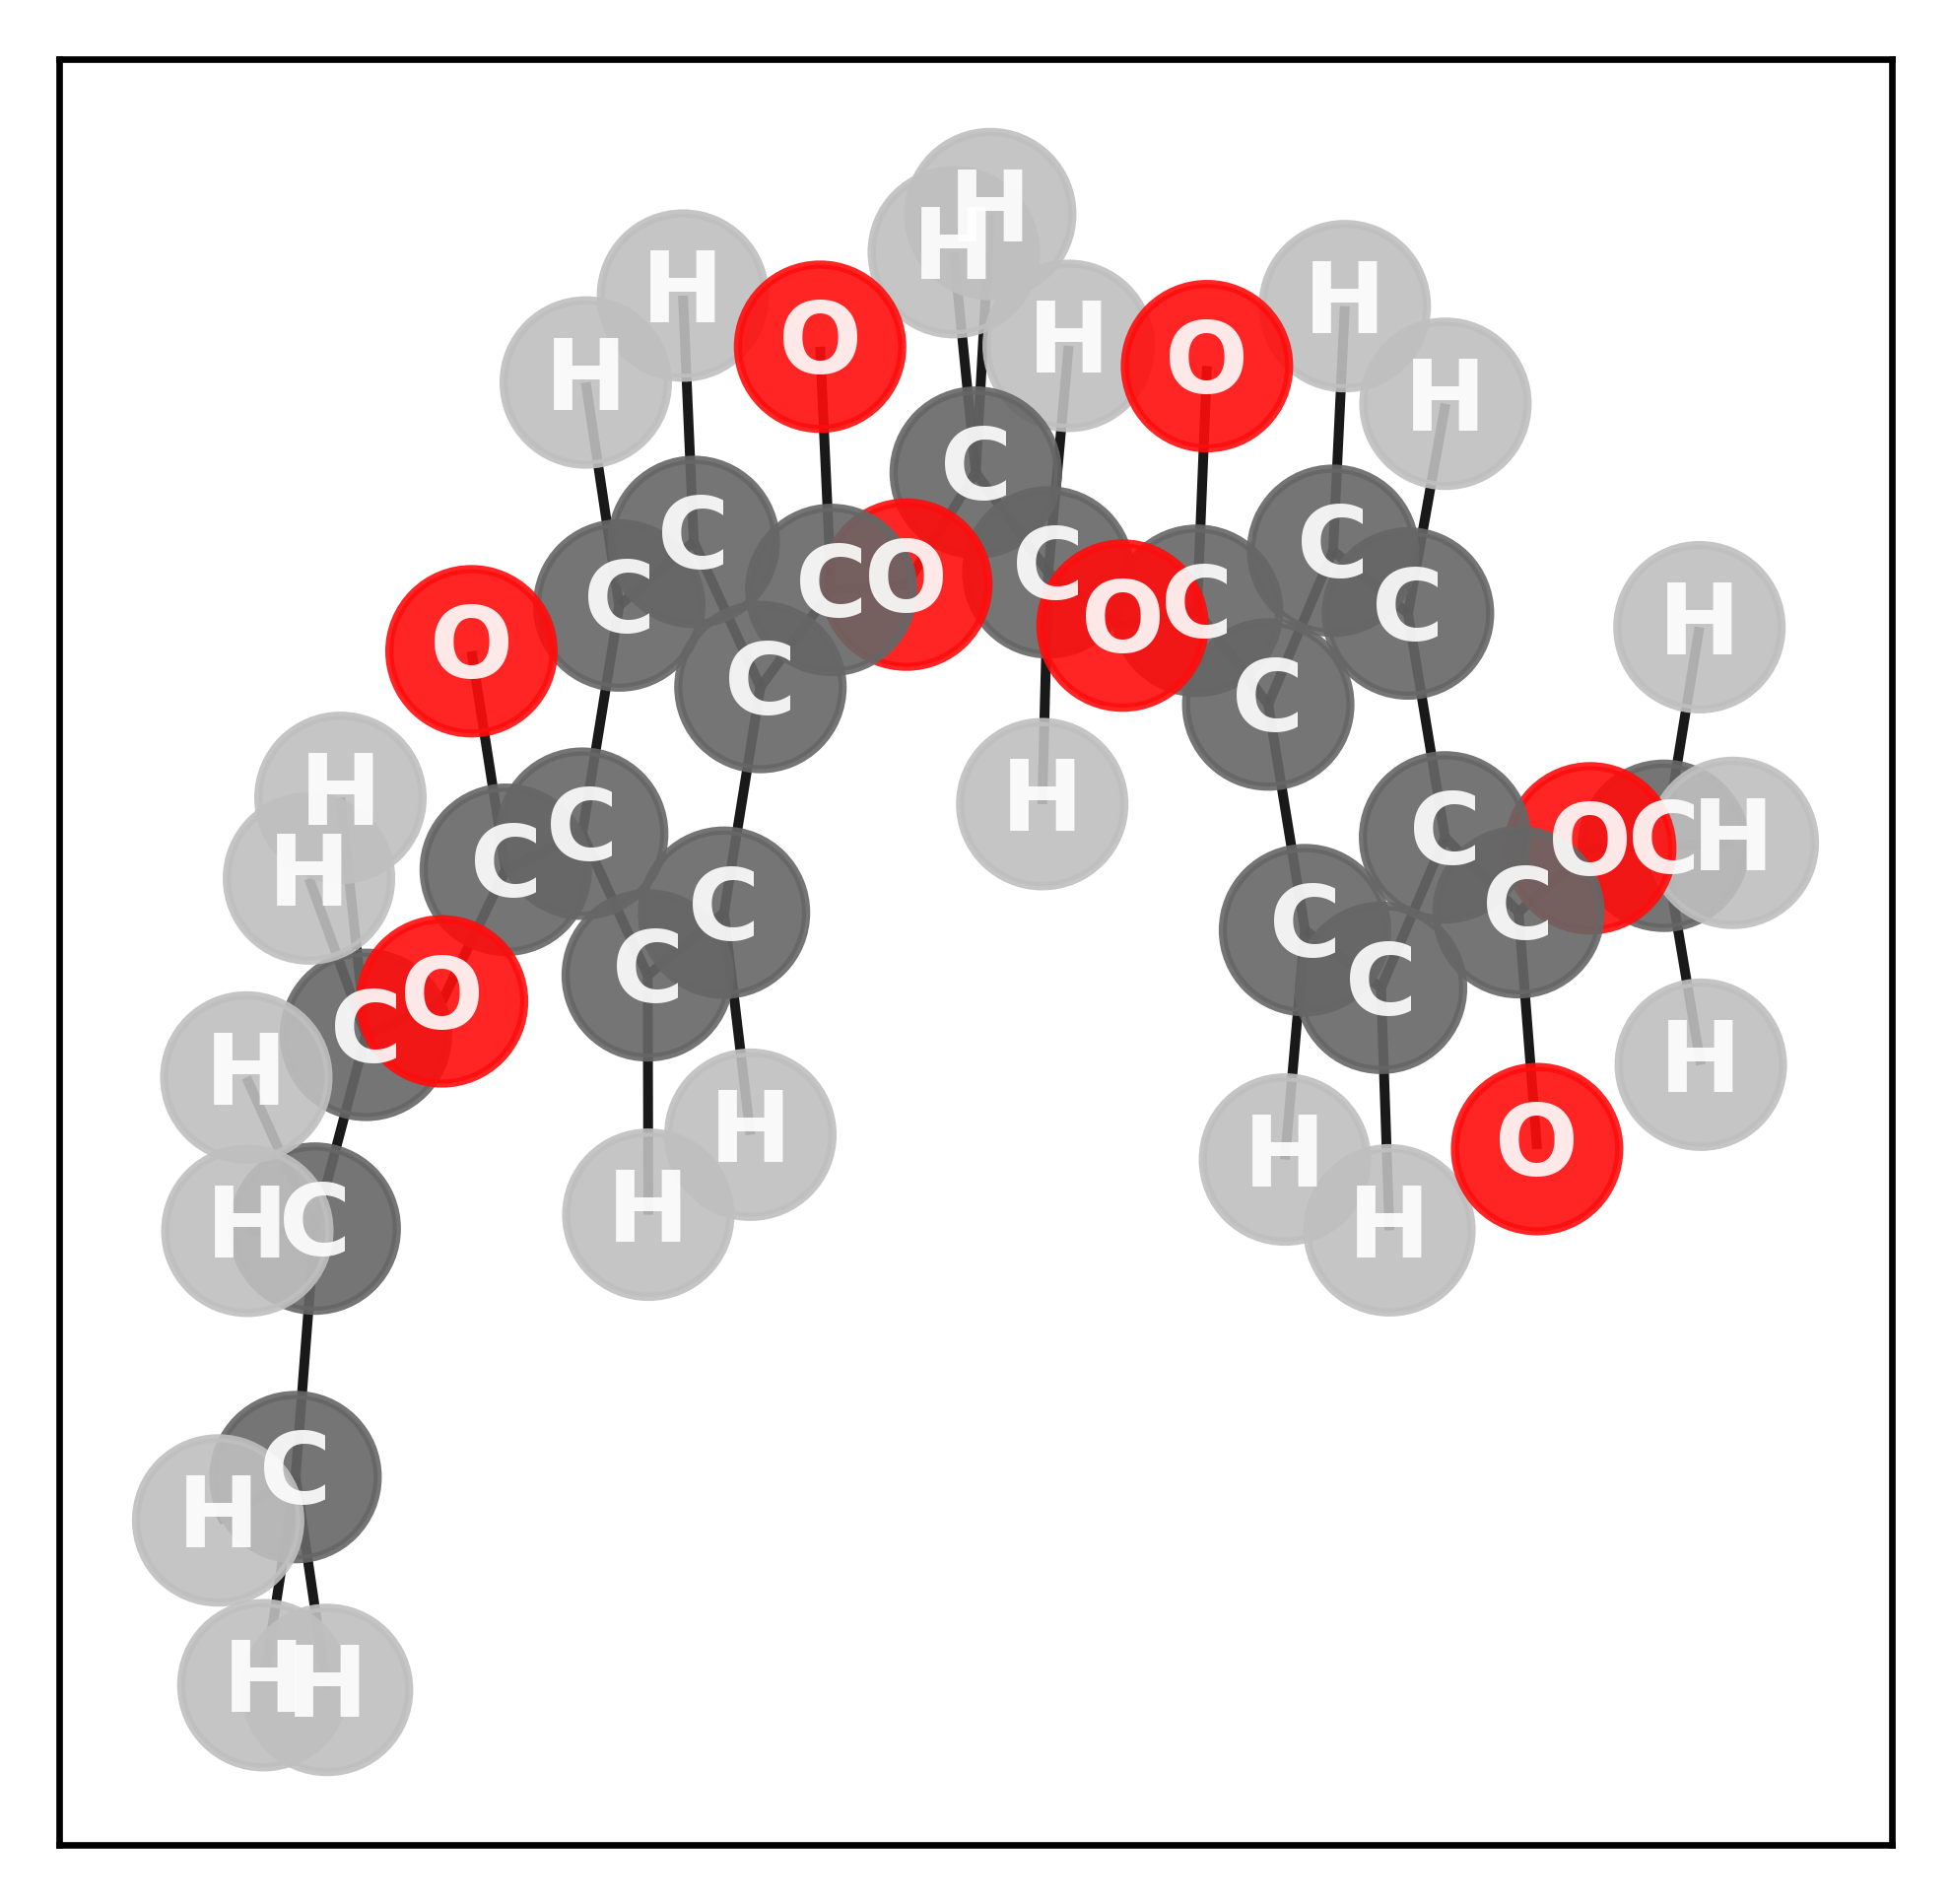

System: PET
GNN energy = -333.81 eV 
VASP energy = -334.81520255 eV
Abs. Error = 1.01 eV
----------PLASTICS----------------
MAE = 0.79 eV
MAE/atom = 0.01 eV/atom
----------------------------------


In [2]:
from pymatgen.io.vasp import Outcar
from pyRDTP.geomio import file_to_mol
from functions import contcar_to_graph
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
import torch
from graph_tools import plotter
import matplotlib.pyplot as plt
from nets import PreTrainedModel
import numpy as np

MODEL_NAME = "LONG_NIGHT_full"
model = PreTrainedModel(MODEL_NAME)

pt_energy = Outcar("./BM_dataset/Plastics/pt-0000/OUTCAR").final_energy * 4
ru_energy = Outcar("./BM_dataset/Plastics/ru-0000/OUTCAR").final_energy * 4
sur = ["pt", "ru"]
plastic = ["PE", "PPit", "PPst", "PS", "PET"]
sur_energy = {"pt": pt_energy, "ru": ru_energy}
error = np.zeros((len(plastic)*(1 + len(sur)),1))
error_per_atom = np.zeros((len(plastic)*(1 + len(sur)),1))
abs_error = np.zeros((len(plastic)*(1 + len(sur)),1))
counter = 0
for metal in sur:
    for molecule in plastic:
        calc = "{}-{}".format(metal, molecule)
        system = "./BM_dataset/Plastics/{}/CONTCAR".format(calc)
        s = Outcar("./BM_dataset/Plastics/{}/OUTCAR".format(calc)).final_energy
        graph = contcar_to_graph(system, model.g_tol, model.g_sf, model.g_metal_2nn)
        gnn_energy = model.evaluate(graph)
        dft_energy = s - sur_energy[metal]
        absolute_error = abs(gnn_energy - dft_energy)
        print("-----------------------------------")
        plotter(graph)
        plt.show()
        print("System: {}-{}".format(metal, molecule))
        print("GNN energy = {:.2f} eV ".format(gnn_energy))
        print("VASP energy = {} eV".format(dft_energy))
        print("Abs. Error = {:.2f} eV".format(absolute_error))
        error[counter] = dft_energy - gnn_energy
        abs_error[counter] = absolute_error
        error_per_atom[counter] = abs_error[counter] / graph.num_nodes
        counter += 1
for molecule in plastic:  # gas phase molecules
    system = "./BM_dataset/Plastics/{}/CONTCAR".format(molecule)
    s = Outcar("./BM_dataset/Plastics/{}/OUTCAR".format(molecule)).final_energy
    graph = contcar_to_graph(system, model.g_tol, model.g_sf, model.g_metal_2nn)
    gnn_energy = model.evaluate(graph)
    dft_energy = s
    absolute_error = abs(gnn_energy - dft_energy)   
    print("-----------------------------------")
    plotter(graph)
    plt.show()
    print("System: {}".format(molecule))
    print("GNN energy = {:.2f} eV ".format(gnn_energy))
    print("VASP energy = {} eV".format(dft_energy))
    print("Abs. Error = {:.2f} eV".format(absolute_error))
    error[counter] = dft_energy - gnn_energy
    abs_error[counter] = absolute_error
    error_per_atom[counter] = abs_error[counter] / graph.num_nodes
    counter += 1
print("----------PLASTICS----------------")
print("MAE = {:.2f} eV".format(np.mean(abs_error)))
print("MAE/atom = {:.2f} eV/atom".format(np.mean(error_per_atom)))
print("----------------------------------")
        

In [3]:
0.79 * 15

11.850000000000001